# Cross Validation, Model Selection & Regularisation

In this notebook we will introduce the concepts below, and how they can be implemented in `scikit-learn`.
* Cross validation - a method for estimating the test error rate when test data is not available
* Model selection - how we use cross validation to select which model (from a selection) we should use for a particular data set
* Regularisation - an adaptation of linear regression to make it more flexible

[This video](https://www.youtube.com/watch?v=DQWI1kvmwRg) describes some of the ideas you will face in the coming notebook. The ideas we are covering here are described much more throughly in **ISLR** (see suggested sections in module overview).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Cross validation

We have already seen the notion of splitting *test* and *training sets* in order to asses model performance. Now we will introduce the idea of *validation sets*.

Once again **ISTL** (Section 5.1) provides a very clear overview of how these technqiues work:

>Resampling methods are an indispensable tool in modern statistics. They
involve repeatedly drawing samples from a training set and refitting a model
of interest on each sample in order to obtain additional information about
the fitted model. For example, in order to estimate the variability of a linear
regression fit, we can repeatedly draw different samples from the training
data, fit a linear regression to each new sample, and then examine the
extent to which the resulting fits differ. Such an approach may allow us to
obtain information that would not be available from fitting the model only
once using the original training sample.

>Resampling approaches can be computationally expensive, because they
involve fitting the same statistical method multiple times using different
subsets of the training data. However, due to recent advances in computing
power, the computational requirements of resampling methods generally
are not prohibitive. [...] cross-validation can be used to estimate the test
error associated with a given statistical learning method in order to evaluate
its performance, or to select the appropriate level of flexibility. The process
of evaluating a model’s performance is known as model assessment, whereas model
the process of selecting the proper level of flexibility for a model is known as assessment
model selection.

The [diagram](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7) below illustrates this process. Here the train and validation sets are used to do model assesment and model selection (NOTE: the test set is strictly forbidden from being used in any way during this process!). Once a model is selected the test set is used to do a final assesment of performance to see if the model selected will generalise as well as predicted.

<img src="././images/testtrainvalid.png" width="450px">

There is a simple overview these ideas [here](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7), and a more thorough overview [here](https://machinelearningmastery.com/difference-test-validation-datasets/).

### K-fold cross validation

A very common method called *k-fold* is often used, which actually splits the training set multiple times. This allows us to assess the accuracy of the model over $k$ validation splits of data. The [image below](http://ethen8181.github.io/machine-learning/model_selection/model_selection.html) illustrates how this works for $k = 5$ splits.

<img src="././images/kfold.png" width="450px">

The `scikit-learn` documentation offers a simple [example](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) of implementing k-fold on some dummy data. We will examine this below. NOTE: The `scikit-learn` documentation is **FANSTASTIC(!)** and contains working examples of every function, it should always be the first place you look when you wish to implement a new function.

**Task 1:** 

* Have a look at the code below and check you understand what is going on. (Add some print statements in various places to help.)

In [2]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([['A', 'B'], ['C', 'D'], ['E', 'F'], ['G', 'H']])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2) # here we choose the number of folds (or splits) we will make
kf.get_n_splits(X)

print(kf)

for train_index, valid_index in kf.split(X): # kf.split(X) is an iterable which gives us the indices of the data in each fold
    print("TRAIN:", train_index, "VALID:", valid_index)
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [2 3] VALID: [0 1]
TRAIN: [0 1] VALID: [2 3]


We can apply this to any data set to perform operations as it gives us the dataframe/numpy array indicies in each loop to select the appropriate data for each fold. For example we can apply this to the auto data set. This contains rows which correspond to individual cars and their attributes.

In [3]:
auto = pd.read_csv('./data/Auto.csv')
auto = auto[auto.horsepower != '?']
auto['horsepower'] = auto.horsepower.astype(int)
auto.reset_index(inplace=True, drop=True)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
mpg = auto.pop('mpg') # mpg will be our target and so we remove this into a seperate array

In [5]:
len(mpg)

392

Say we are trying to predict 'mpg' from our other automobile data features. We can use KFold to iterate over the number of splits we choose.

**Task 2:**
* try adding print statements for the size of the dataframes in each split
* try increasing the number of splits and re-run your code
* use the code below to print a car name contained in the train and validation data set, for each split



In [6]:
kf = KFold(n_splits=8) # here we choose the number of folds (or splits) we will make
kf.get_n_splits(auto)

print(kf)


split_counter = 1
for train_index, valid_index in kf.split(auto): # kf.split(X) is an iterable which gives us the indices of the data in each fold
    print('-'*30)
    print('This is split no: {}'.format(split_counter))
    split_counter += 1 
    X_train, X_valid = auto.iloc[train_index], auto.iloc[valid_index] # must use .iloc because its a dataframe this time
    y_train, y_valid = mpg[train_index], mpg[valid_index]
    
    # your code here
    print(X_train.name.unique()[1])
    print(X_valid.name.unique()[1])    

KFold(n_splits=8, random_state=None, shuffle=False)
------------------------------
This is split no: 1
peugeot 304
buick skylark 320
------------------------------
This is split no: 2
buick skylark 320
peugeot 304
------------------------------
This is split no: 3
buick skylark 320
ford maverick
------------------------------
This is split no: 4
buick skylark 320
subaru
------------------------------
This is split no: 5
buick skylark 320
dodge aspen se
------------------------------
This is split no: 6
buick skylark 320
honda civic cvcc
------------------------------
This is split no: 7
buick skylark 320
mercedes benz 300d
------------------------------
This is split no: 8
buick skylark 320
toyota tercel


In [7]:
auto = auto.drop('name', axis=1, errors='ignore') # we do not need the car names so remove for now.

We can use the same loop to fit and evaluate our linear regression model on each train/validation split:

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


split_counter = 1
mse_scores = [] # create empty list of scores for each split
kf = KFold(n_splits=5)
kf.get_n_splits(auto)

for train_index, valid_index in kf.split(auto): # kf.split(X) is an iterable which gives us the indices of the data in each fold
    print('-'*30)
    print('This is split no: {}'.format(split_counter))
    split_counter += 1 
    X_train, X_valid = auto.iloc[train_index], auto.iloc[valid_index] # must use .iloc because its a dataframe this time
    y_train, y_valid = mpg[train_index], mpg[valid_index]
    
    
    #### fit polynomial to train data in this split
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    #### eval & print MSE training results in this split
    mpg_train_pred = lin_reg.predict(X_train)
    mse_train = mean_squared_error(y_train, mpg_train_pred)
    print('training MSE: {0}'.format(mse_train))
    
    #### do the same for validation split
    mpg_valid_pred = lin_reg.predict(X_valid)
    mse_valid = mean_squared_error(y_valid, mpg_valid_pred)
    print('validation MSE: {0}'.format(mse_valid))
    
    mse_scores.append(mse_valid) # assign validation MSE score to list
    

------------------------------
This is split no: 1
training MSE: 11.284070590566001
validation MSE: 14.974307651304168
------------------------------
This is split no: 2
training MSE: 11.155158050598772
validation MSE: 10.905952427081171
------------------------------
This is split no: 3
training MSE: 12.16010513687152
validation MSE: 5.991708610108162
------------------------------
This is split no: 4
training MSE: 9.921674145405685
validation MSE: 15.587544657621601
------------------------------
This is split no: 5
training MSE: 7.977511689294959
validation MSE: 27.844743081984223


When using k-fold cross validation we can analyse the validation MSE result for each split to assess the overall performance.

In [9]:
mse_scores  = np.array(mse_scores)
print('VALIDATION SET MSE SCORES')
print('mean MSE:', mse_scores.mean())
print('std MSE:', mse_scores.std())

VALIDATION SET MSE SCORES
mean MSE: 15.060851285619865
std MSE: 7.255691814890938


#### Cross validation in practice in sklearn
Most of the time we do not care about having access to each split. `Scikit-Learn` provide a much easier way to do all of this with the function `cross_val_score`. This allows us to do the same as above but in much less code.

In [10]:
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()

cv_scores = cross_val_score(lin_reg, auto, mpg, cv = 5, scoring='neg_mean_squared_error') # utilisation de neg car convention dans sklearn que higher scoring val is better

print('mean MSE:',np.mean(-cv_scores))
print('std MSE:',np.std(-cv_scores))
print(cv_scores)

mean MSE: 15.060851285619865
std MSE: 7.255691814890938
[-14.97430765 -10.90595243  -5.99170861 -15.58754466 -27.84474308]


**Task 3:**

* Make sure you understand the output of the cross_val_score above (i.e. What is cv_scores?)
* Investigate what the `cross_val_predict` function does.
* Import and implement this on the same data as above.
* What are the outputs of this function?
* Can you use these to evaluate the results of your cross validation?
* Do the cross-validation scores give you confidence this model is providing a useful prediction?

In [11]:
# Cross_val_predict
from sklearn.model_selection import cross_val_predict


cv_predict = cross_val_predict(lin_reg, auto, mpg, cv = 5)

Cross_val_predict returns the predicted value when the element was in the validation set.  
It is not suitable for evaluation because it blends the 5 models together...  
It is best used for data viz (or Model blending ?)

In [12]:
print(np.mean(np.sqrt(-cv_scores)))
print(np.std(np.sqrt(-cv_scores)))

3.7689592371135645
0.9250932680525775


In [13]:
mpg.std()

7.805007486571799

## Exercise 1: wine cross-validation

You must predict the alcohol content of various wines based on their other attributes.

* Split the data into train and test data sets (Ensure you use the option: `random_state = 28`).
* Perform linear regression using k-fold cross validation(ensure you use 5 folds). Return the cross validation MSE errors. Return the mean and standard deviations of these.
* Evaluate the performance of the model on the test set.
* Compare the cross-validation error and the test error (MSE). What do you find? 
* Try removing the random_state option. What happens to your results? Explain why.

In [14]:
#### your solution here
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


wine = pd.read_csv('./data/wine.csv')

In [15]:
alcohol = wine.pop('Alcohol')

In [16]:
wine

,Grape,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,-0.56,0.23,-1.17,1.91,0.81,1.03,-0.66,1.22,0.25,0.36,1.84,1.01
1,1,-0.50,-0.83,-2.48,0.02,0.57,0.73,-0.82,-0.54,-0.29,0.40,1.11,0.96
2,1,0.02,1.11,-0.27,0.09,0.81,1.21,-0.50,2.13,0.27,0.32,0.79,1.39
3,1,-0.35,0.49,-0.81,0.93,2.48,1.46,-0.98,1.03,1.18,-0.43,1.18,2.33
4,1,0.23,1.84,0.45,1.28,0.81,0.66,0.23,0.40,-0.32,0.36,0.45,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,2.97,0.30,0.30,-0.33,-0.98,-1.42,1.27,-0.93,1.14,-1.39,-1.23,-0.02
174,3,1.41,0.41,1.05,0.16,-0.79,-1.28,0.55,-0.32,0.97,-1.13,-1.48,0.01
175,3,1.74,-0.39,0.15,1.42,-1.13,-1.34,0.55,-0.42,2.22,-1.61,-1.48,0.28
176,3,0.23,0.01,0.15,1.42,-1.03,-1.35,1.35,-0.23,1.83,-1.56,-1.40,0.30


In [17]:
X_train, X_test, y_train, y_test = train_test_split(wine, alcohol,random_state=28)

In [18]:
lin_reg = LinearRegression()
cv_scores = cross_val_score(lin_reg,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
print('Train mean MSE:',np.mean(-cv_scores))
print(f'mean RMSE : {np.mean(np.sqrt(-cv_scores))}')
print('std MSE:',np.std(-cv_scores))

Train mean MSE: 0.4771472419568701
mean RMSE : 0.6828399536518984
std MSE: 0.13726764524713442


In [19]:
lin_reg.fit(X_train,y_train)
y_test_predict = lin_reg.predict(X_test)
mse_test = mean_squared_error(y_test,y_test_predict)
rmse_test = np.sqrt(mse_test)
print(f'MSE Test {mse_test:.5f} | RMSE {rmse_test:.5f}')

MSE Test 0.47723 | RMSE 0.69082


In [20]:
alcohol.agg(['mean','std'])

mean   -0.000112
std     0.999626
Name: Alcohol, dtype: float64

## Regularisation

An alternative to choosing models which contains smaller numbers of features is to use a method that *constrains* or *regularises* the coefficent estimates assigned to each feature, or that shrinks the coefficient towards zero. This technique is very similar to *least squares* which we have been using until now. Please refer to Section in 6.2 **ISTL** for a fuller explanation of this.

When we move to use a regularised linear regression for prediction the additional term means that we now have a model parameter that requires setting. These terms are referred to as *hyperparameters* in machine learning. In practice this introduces another additional unknown parameter which we must choose somewhere in our modelling. It is common practice to run several models, each with different values of this hyperparameter, and then assess the error of each using cross validation for comparison.

For now we will focus on how to implement Lasso and Ridge regression in sklearn. These are both types of regularised linear regression.

#### Lasso regression in sklearn

In this example we aim to predict credit rating of individual customers. To train and predict using a Lasso regression we follow much the same procedure as we have seen before in `scikit-learn`.

Ressources supplémentaires si vous souhaitez creuser :

https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net

http://eric.univ-lyon2.fr/~ricco/cours/slides/regularized_regression.pdf

In [21]:
credit = pd.read_csv('./data/credit_modified.csv')
rating = credit.pop('Rating')
credit.head()

,Income,Limit,Cards,Age,Education,Gender,Student,Married,Balance,African American,Asian,Caucasian
0,14.891,3606,2,34,11,0,0,1,333,0,0,1
1,106.025,6645,3,82,15,1,1,1,903,0,1,0
2,104.593,7075,4,71,11,0,0,0,580,0,1,0
3,148.924,9504,3,36,11,1,0,0,964,0,1,0
4,55.882,4897,2,68,16,0,0,1,331,0,0,1


In [22]:
#### splitting train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(credit, rating, random_state = 91)

In [23]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 10)
cv_scores = cross_val_score(lasso, X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print('mean MSE:',np.mean(-cv_scores))
print('std MSE:',np.std(-cv_scores))



mean MSE: 148.3658024815139
std MSE: 22.577610846122578


Here we can alter the alpha parameter to change the amount of regularisation the model uses (try this yourself! - vary the value by at least factors of 10). With increases in regularisation we expect a reduction in the *variance* of the model.

#### Using Lasso with grid search

In practice we do not want to vary hyperparameters by hand to find which value is best (the model with minimum cross validation error). Of course `scikit-learn` has a function that automates this for you. Using `GridSearchCV` we pass a dictionary of parameter values we wish to investigate. The function will fit each model we have listed and calculate the cross validation error of each. It provides all the results through the object it returns.

In [175]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso(max_iter=10000)

param_grid = [
 {'alpha': [0.001, 0.01, 0.1, 1, 3, 10, 100, 1000]},
 ]

grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

grid_results = pd.DataFrame(grid_search.cv_results_)

grid_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002624,0.000284,0.001010,0.000121,0.001,{'alpha': 0.001},-134.693531,-105.857049,-101.376944,-87.569097,-78.913304,-76.137420,-109.786540,-103.885686,-106.104721,-113.455931,-101.778022,16.450021,3
1,0.002378,0.000192,0.001017,0.000081,0.01,{'alpha': 0.01},-134.553201,-105.948212,-101.096381,-87.881139,-78.937345,-76.585584,-109.682491,-103.106018,-106.112572,-113.688788,-101.759173,16.329243,2
2,0.001976,0.000220,0.000995,0.000070,0.1,{'alpha': 0.1},-133.132694,-106.809300,-98.722275,-91.394863,-79.351692,-78.012317,-108.680986,-96.604537,-106.093953,-115.062267,-101.386489,15.688554,1
3,0.001618,0.000043,0.000935,0.000025,1,{'alpha': 1},-127.851853,-111.017555,-92.827631,-106.006184,-89.048154,-82.339570,-105.158164,-94.934777,-102.310102,-122.139519,-103.363351,13.605513,4
4,0.001514,0.000016,0.000914,0.000016,3,{'alpha': 3},-132.499698,-117.173048,-106.238114,-112.301661,-94.847286,-76.537019,-102.509314,-98.851062,-105.902336,-131.338637,-107.819817,15.910751,5


`GridSearchCV` also returns a model (with the best hyperparmeter combination it found) which has been fitted one final time to all of the training data. Therefore it is ready to make predictions on the testing set. The model can be accessed like this:

In [25]:
grid_search.best_estimator_

Lasso(alpha=0.1, max_iter=10000)

In [26]:
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003136,0.000885,0.001247,0.000359,0.001,{'alpha': 0.001},-134.693531,-105.857049,-101.376944,-87.569097,-78.913304,-76.137420,-109.786540,-103.885686,-106.104721,-113.455931,-101.778022,16.450021,3
1,0.002201,0.000040,0.000956,0.000019,0.01,{'alpha': 0.01},-134.553201,-105.948212,-101.096381,-87.881139,-78.937345,-76.585584,-109.682491,-103.106018,-106.112572,-113.688788,-101.759173,16.329243,2
2,0.001822,0.000147,0.000931,0.000028,0.1,{'alpha': 0.1},-133.132694,-106.809300,-98.722275,-91.394863,-79.351692,-78.012317,-108.680986,-96.604537,-106.093953,-115.062267,-101.386489,15.688554,1
3,0.001533,0.000018,0.000904,0.000017,1,{'alpha': 1},-127.851853,-111.017555,-92.827631,-106.006184,-89.048154,-82.339570,-105.158164,-94.934777,-102.310102,-122.139519,-103.363351,13.605513,4
4,0.001557,0.000140,0.000946,0.000088,3,{'alpha': 3},-132.499698,-117.173048,-106.238114,-112.301661,-94.847286,-76.537019,-102.509314,-98.851062,-105.902336,-131.338637,-107.819817,15.910751,5
5,0.001442,0.000008,0.000906,0.000012,10,{'alpha': 10},-182.681016,-155.361568,-179.884644,-148.842090,-141.841896,-86.351859,-129.718484,-131.176340,-143.631521,-181.271903,-148.076132,28.028584,6
6,0.001381,0.000022,0.000904,0.000005,100,{'alpha': 100},-188.380866,-143.744333,-184.078341,-145.491583,-157.301014,-103.112064,-146.957766,-126.231725,-143.006029,-181.543599,-151.984732,25.542857,7
7,0.001356,0.000026,0.000934,0.000105,1000,{'alpha': 1000},-188.587767,-146.517162,-180.483375,-143.257202,-158.504388,-103.017203,-150.127246,-121.916885,-144.912869,-185.805136,-152.312923,26.074170,8


**Task 4:**
* How many times will the lasso model be fitted when the GridSearchCV function is called above?

<details><summary>Hint</summary><br>
Check what the `refit=True` parameter does in GridSearchCV
</details>

* Look through the columns of the `grid_results` dataframe. Try and understand what the table contains.

nb of fitted with GridSearchCV = 80 (8*alpha *10fold)
in grid resuls =>
 - Fit times mean/std
 - mean score time (validations)
 - Test score for each fold (values, mean,sd and rank)

## Model selection

Congratulations! You have just done your first model hyperparameter tuning in `scikit-learn`! 

If we have a dataset for which we are interested in developing a predictive model. We do not know beforehand which model will perform best for this particular data or problem. Therefore, we fit and evaluate a number of different models to our data. The models could also be of varying type as well as flexibility (e.g. random forests, support vector machines, linear regression). We then need to decide which of our models we will choose to use in our final product.

As **ISLR** states:
> "we can directly estimate the test error using the validation set and cross-validation methods
discussed in Chapter 5. We can compute the validation set error or the
cross-validation error for each model under consideration, and then select
the model for which the resulting estimated test error is smallest."

This works as a simple rule, which we will follow for the remainder of this notebook. However in practice the selection can sometimes be a bit more nuanced. Read more detail [here](https://machinelearningmastery.com/a-gentle-introduction-to-model-selection-for-machine-learning/).

#### Task 5: Ridge regression in sklearn

Another type of regularised linear model is know as *Ridge regression*.

* Repeat the model prediction process above on the credit data but use a ridge regression model.
* Try replacing `GridSearchCV` with `RandomizedSearchCV`
* How do these functions differ?

In [27]:
#### your solution here
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


ridge = Ridge(max_iter=10000)

param_grid = [
 {'alpha': [0.001, 0.01, 0.1, 1, 3, 10, 100, 1000]},
 ]
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

grid_results = pd.DataFrame(grid_search_ridge.cv_results_)

grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003507,0.006477,0.000943,0.000102,0.001,{'alpha': 0.001},-134.709207,-105.847146,-101.408319,-87.535423,-78.910802,-76.088537,-109.798419,-103.970825,-106.104415,-113.431271,-101.780436,16.463655,6
1,0.001305,0.000009,0.000909,0.000006,0.01,{'alpha': 0.01},-134.708083,-105.847646,-101.405663,-87.537922,-78.910278,-76.089237,-109.797587,-103.951593,-106.104574,-113.432645,-101.778523,16.463002,5
2,0.001379,0.000149,0.000983,0.000136,0.1,{'alpha': 0.1},-134.696920,-105.852592,-101.379213,-87.562901,-78.905195,-76.096104,-109.789211,-103.762049,-106.106093,-113.446278,-101.759656,16.456623,4
3,0.001340,0.000074,0.000932,0.000049,1,{'alpha': 1},-134.591854,-105.896229,-101.125522,-87.810393,-78.868133,-76.152928,-109.700721,-102.109819,-106.115508,-113.572360,-101.594347,16.404872,3
4,0.001352,0.000021,0.000932,0.000012,3,{'alpha': 3},-134.391253,-105.965205,-100.621625,-88.340987,-78.849639,-76.222951,-109.483397,-99.544295,-106.108819,-113.805661,-101.333383,16.332863,2
5,0.001379,0.000108,0.000929,0.000013,10,{'alpha': 10},-133.890522,-106.090432,-99.320843,-89.982387,-79.071589,-76.191060,-108.669389,-95.536294,-105.969953,-114.432072,-100.915454,16.192486,1
6,0.001462,0.000162,0.000992,0.000161,100,{'alpha': 100},-134.083288,-108.689604,-99.945650,-100.567871,-82.857511,-72.598275,-102.841444,-94.279222,-106.194183,-121.853714,-102.391076,16.678747,7
7,0.001396,0.000070,0.000940,0.000028,1000,{'alpha': 1000},-159.394337,-130.276230,-139.267945,-127.599179,-104.683784,-68.050042,-105.482490,-112.287832,-123.522302,-154.546831,-122.511097,25.363301,8


In [28]:
from sklearn.utils.fixes import loguniform
ridge = Ridge(max_iter=10000)

param_grid = [
 {'alpha': loguniform(0.1,1000)},
 ]
grid_search_ridge = RandomizedSearchCV(ridge,param_grid,cv=10,n_iter=100, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

grid_results = pd.DataFrame(grid_search_ridge.cv_results_)

grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001632,0.000238,0.001056,0.000136,0.774992,{'alpha': 0.7749919439446241},-134.617085,-105.886234,-101.187192,-87.748957,-78.875269,-76.140566,-109.723569,-102.485548,-106.114059,-113.542420,-101.632090,16.416096,41
1,0.001416,0.000120,0.000931,0.000023,10.126409,{'alpha': 10.126408624118785},-133.883415,-106.092231,-99.302530,-90.009360,-79.077344,-76.188487,-108.654926,-95.496804,-105.966978,-114.442472,-100.911455,16.190475,17
2,0.001312,0.000021,0.000909,0.000010,0.119875,{'alpha': 0.11987456601115223},-134.694472,-105.853668,-101.373400,-87.568412,-78.904110,-76.097588,-109.787348,-103.720863,-106.106413,-113.449261,-101.755554,16.455250,63
3,0.001296,0.000005,0.000906,0.000007,25.16373,{'alpha': 25.163730169802477},-133.330777,-106.356927,-97.971637,-92.750890,-79.834385,-75.704292,-107.112169,-93.355789,-105.678744,-115.681634,-100.777724,16.036802,4
4,0.001294,0.000004,0.000900,0.000005,10.011174,{'alpha': 10.011173954962464},-133.889892,-106.090591,-99.319218,-89.984774,-79.072097,-76.190835,-108.668110,-95.532776,-105.969690,-114.432992,-100.915097,16.192308,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001269,0.000003,0.000893,0.000004,378.883038,{'alpha': 378.88303763890167},-144.264672,-117.688798,-117.013518,-113.950199,-91.540788,-67.491908,-100.589605,-102.100147,-113.029441,-137.798977,-110.546805,20.917918,90
96,0.001273,0.000004,0.000892,0.000004,0.10297,{'alpha': 0.10297014115472128},-134.696553,-105.852753,-101.378343,-87.563725,-78.905032,-76.096327,-109.788933,-103.755879,-106.106141,-113.446724,-101.759041,16.456417,65
97,0.001273,0.000006,0.000891,0.000003,4.67856,{'alpha': 4.67856016708368},-134.247891,-106.004898,-100.251236,-88.763789,-78.875776,-76.243345,-109.289919,-98.102938,-106.085233,-113.972211,-101.183724,16.291243,23
98,0.001270,0.000003,0.000892,0.000003,0.555396,{'alpha': 0.5553964613434926},-134.642346,-105.875920,-101.248476,-87.688701,-78.883525,-76.127379,-109.745431,-102.874785,-106.112093,-113.512243,-101.671090,16.428036,47


In [29]:
grid_results.loc[grid_results.rank_test_score.idxmin()]

mean_fit_time                              0.00128
std_fit_time                              0.000004
mean_score_time                           0.000898
std_score_time                            0.000004
param_alpha                              21.207189
params               {'alpha': 21.207188857557554}
split0_test_score                      -133.429992
split1_test_score                      -106.274559
split2_test_score                       -98.189357
split3_test_score                       -92.105208
split4_test_score                       -79.633277
split5_test_score                       -75.853626
split6_test_score                      -107.483331
split7_test_score                       -93.624588
split8_test_score                      -105.737383
split9_test_score                      -115.350862
mean_test_score                        -100.768218
std_test_score                           16.061452
rank_test_score                                  1
Name: 44, dtype: object

## Exercise 2: Moneyball

Moneyball, as well as being a fantastic story, is also a true story of statistical methods being applied in a real world context to make predictions for decision making. [The film Moneyball](https://www.youtube.com/watch?v=-4QPVo0UIzc) is well worth a watch if you have time. As well as in baseball most major competitive sports teams are now using data science to improve their performance, e.g. [football](http://outsideoftheboot.com/2013/06/26/rise-of-data-analysis-in-football/),...

In this exercise you have been hired by Oakland Athletics general manager Billy Beane. Your first mission is to predict the salary each player will make based on other information that is available. This will allow Billy to understand what price he should pay for players in the next transfer season.

You must:
* Import and prepare the data
* Create a train and test set
* Implement a regularised model of your choice
* Choose optimal parameters for your regularised model
* Estimate test-error using k-fold cross validation
* Calculate the true test-error

<details><summary>HINT 1</summary><br>
Some values are missing. You can drop these rows.
</details>

<details><summary>HINT 2</summary><br>
Some columns do not contain numerical values. You can drop these columns.
</details>

#### clean data

In [30]:
#### note data is in the Hitters.csv file
baseball = pd.read_csv('data/Hitters.csv')
#### your solution here



In [31]:
baseball.isna().value_counts()

Unnamed: 0  AtBat  Hits   HmRun  Runs   RBI    Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI   CWalks  League  Division  PutOuts  Assists  Errors  Salary  NewLeague
False       False  False  False  False  False  False  False  False   False  False   False  False  False   False   False     False    False    False   False   False        263
                                                                                                                                                      True    False         59
dtype: int64

In [32]:
baseball

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


In [33]:
baseball.Salary.isna().value_counts()

False    263
True      59
Name: Salary, dtype: int64

In [34]:
baseball = baseball.dropna(how='any')

In [35]:
baseball[['League','Division','NewLeague']].value_counts()

League  Division  NewLeague
A       W         A            67
        E         A            64
N       W         N            58
        E         N            56
                  A             5
        W         A             5
A       E         N             4
        W         N             4
dtype: int64

=>https://en.wikipedia.org/wiki/Major_League_Baseball  
League :  - A = American League
          - N = National League  
Divition = East, Central, West  
Je vais drop ces variables pour l'instantces

In [36]:
baseball_dp = baseball.drop(['Unnamed: 0','League','Division','NewLeague'],axis=1)

#### Observation des données

In [37]:
baseball_dp.corr()['Salary']

AtBat      0.394771
Hits       0.438675
HmRun      0.343028
Runs       0.419859
RBI        0.449457
Walks      0.443867
Years      0.400657
CAtBat     0.526135
CHits      0.548910
CHmRun     0.524931
CRuns      0.562678
CRBI       0.566966
CWalks     0.489822
PutOuts    0.300480
Assists    0.025436
Errors    -0.005401
Salary     1.000000
Name: Salary, dtype: float64

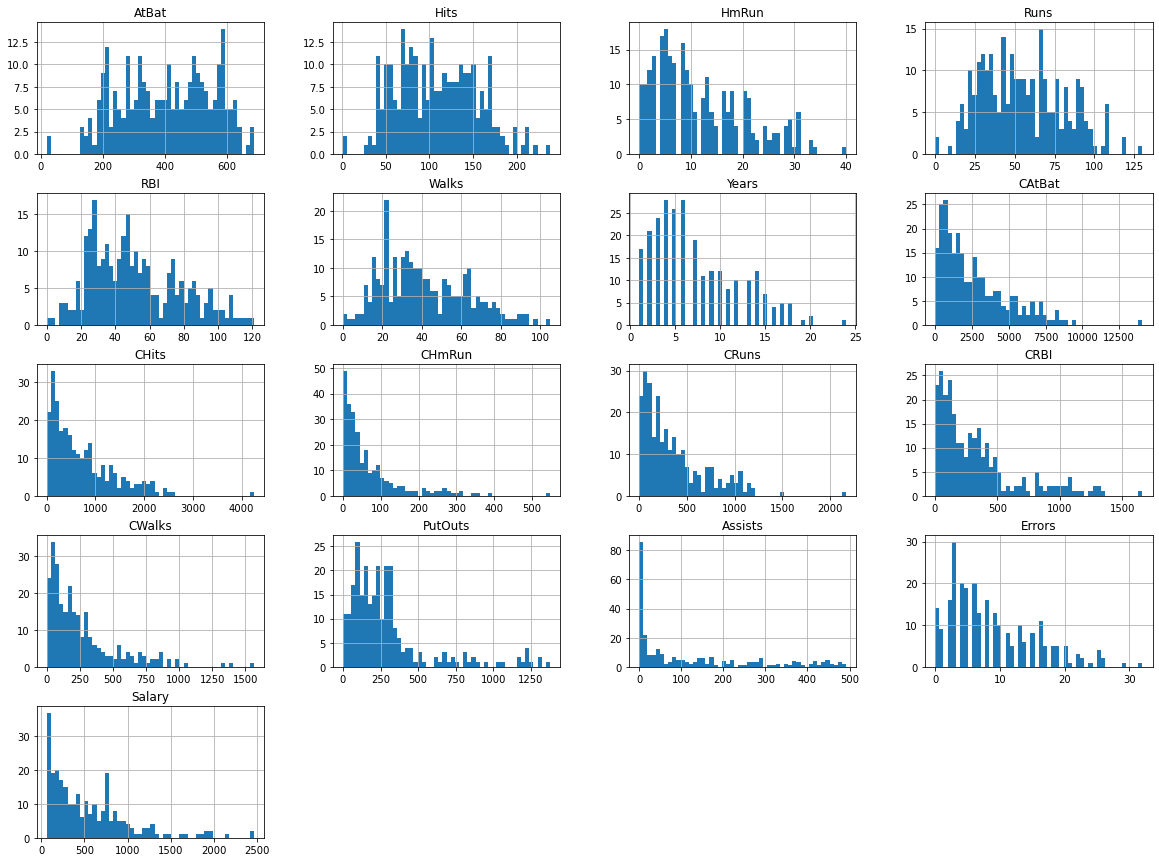

In [38]:
baseball_dp.hist(bins=50, figsize=(20,15));

On a pas mal de données qui sont non normales très tail heavy donc il faut sans doute realiser une transformation dessus pour que l'on puisse l'utiliser  
cf Feature Scaling
On peut essayer de tout standardiser avec un pipeline avec StandardScaler

In [39]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [40]:
salary = baseball_dp.pop('Salary')

In [41]:
scaler = StandardScaler()
baseball_arr = scaler.fit_transform(baseball_dp) 

In [42]:
baseball_std = pd.DataFrame(baseball_arr)

In [43]:
baseball_std.columns = baseball_dp.columns

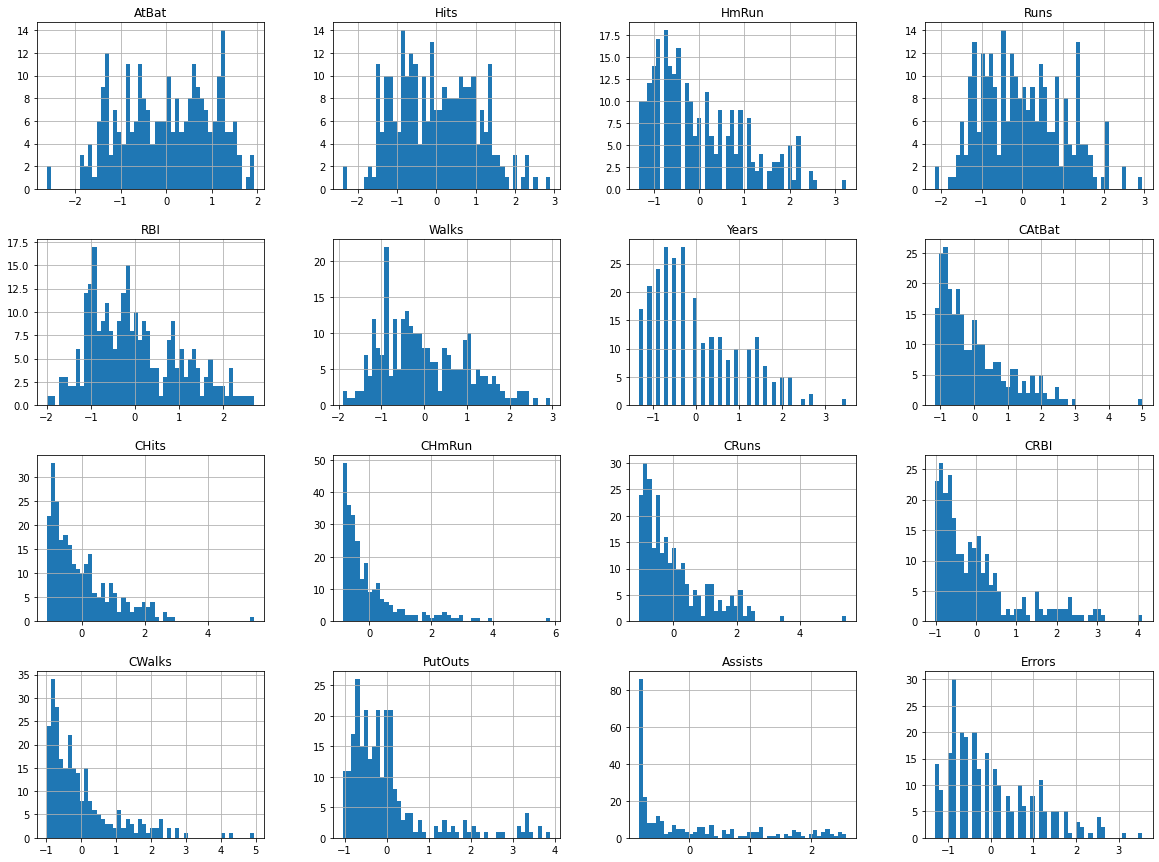

In [44]:
baseball_std.hist(bins=50, figsize=(20,15));

#### Generation train/test df

In [45]:
baseball_train,baseball_test,salary_train,salary_test = train_test_split(baseball_std,salary,random_state=2708)

In [46]:
lasso = Lasso(max_iter=10000)
param_grid = [
 {'alpha': [0.1,1,10,100,500,1000,10000,0.001,0.000001]},
 ]
grid_search_rdm_lasso = GridSearchCV(lasso,param_grid,cv=10, scoring='neg_mean_squared_error')
grid_search_rdm_lasso.fit(baseball_train, salary_train)

grid_results = pd.DataFrame(grid_search_rdm_lasso.cv_results_)
grid_results['RMSE_train'] = np.sqrt(-grid_results['mean_test_score'])
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,RMSE_train
0,0.003651,0.000343,0.000916,0.000092,0.1,{'alpha': 0.1},-186864.296061,-90249.147327,-62799.826480,-84766.174178,-48233.884190,-128207.794961,-109464.232052,-340220.535485,-157961.884136,-46259.702209,-125502.747708,83827.795766,2,354.263670
1,0.002531,0.000327,0.000846,0.000021,1,{'alpha': 1},-174752.442947,-93599.808178,-64147.479101,-84531.756098,-48940.115534,-121171.665779,-117647.265182,-347672.473252,-146248.340515,-42563.342924,-124127.468951,84544.971590,1,352.317284
2,0.001554,0.000234,0.000851,0.000026,10,{'alpha': 10},-151616.091341,-117817.672361,-65704.108437,-72031.612586,-44926.630161,-124256.488960,-168353.632713,-372029.496384,-134981.140425,-30217.275130,-128193.414850,92400.471321,5,358.041080
3,0.001265,0.000035,0.000832,0.000007,100,{'alpha': 100},-198744.307005,-163864.387719,-98373.363791,-94443.365485,-89195.530353,-82600.480834,-255094.595963,-298552.109598,-96850.660347,-49856.129571,-142757.493067,78741.137927,6,377.832626
4,0.001176,0.000008,0.000833,0.000006,500,{'alpha': 500},-302223.255765,-265080.178923,-184092.132761,-170097.580045,-181180.587670,-104758.082564,-426620.948097,-281475.114732,-108982.501522,-132197.163408,-215670.754549,96787.584131,7,464.403655
5,0.001487,0.000251,0.008368,0.021921,1000,{'alpha': 1000},-302223.255765,-265080.178923,-184092.132761,-170097.580045,-181180.587670,-104758.082564,-426620.948097,-281475.114732,-108982.501522,-132197.163408,-215670.754549,96787.584131,7,464.403655
6,0.001362,0.000128,0.000955,0.000083,10000,{'alpha': 10000},-302223.255765,-265080.178923,-184092.132761,-170097.580045,-181180.587670,-104758.082564,-426620.948097,-281475.114732,-108982.501522,-132197.163408,-215670.754549,96787.584131,7,464.403655
7,0.006809,0.000544,0.000855,0.000034,0.001,{'alpha': 0.001},-188449.617233,-90210.723812,-62688.648190,-85061.310749,-48445.354042,-129428.542029,-108874.046475,-339261.652047,-158844.713108,-46778.491203,-125804.309889,83677.881633,3,354.689033
8,0.011776,0.000973,0.000829,0.000004,0.000001,{'alpha': 1e-06},-188464.616530,-90210.575307,-62687.669284,-85065.482374,-48447.576928,-129442.182720,-108870.712519,-339252.663510,-158853.958518,-46783.889645,-125807.932734,83676.365214,4,354.694140


In [47]:
ridge = Ridge(max_iter=10000)
param_grid = [
 {'alpha': [0.1,1,10,100,500,1000,10000,0.001,0.000001]},
 ]
grid_search_rdm_ridge = GridSearchCV(ridge,param_grid,cv=10, scoring='neg_mean_squared_error')
grid_search_rdm_ridge.fit(baseball_train, salary_train)

grid_results = pd.DataFrame(grid_search_rdm_ridge.cv_results_)
grid_results['RMSE_train'] = np.sqrt(-grid_results['mean_test_score'])
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,RMSE_train
0,0.001934,0.001547,0.000945,0.000092,0.1,{'alpha': 0.1},-181315.347586,-90560.672297,-62874.521310,-84881.432694,-48806.782350,-125541.359629,-109870.969637,-340347.527002,-156710.593109,-45748.335665,-124665.754128,83379.239296,3,353.080379
1,0.001263,0.000047,0.000897,0.000092,1,{'alpha': 1},-163184.385279,-94307.776470,-64625.561898,-85832.735987,-52489.718666,-121126.636224,-115392.093760,-345768.722593,-141755.798360,-39469.040565,-122395.246980,83193.477035,1,349.850321
2,0.001222,0.000050,0.000897,0.000133,10,{'alpha': 10},-146445.386814,-109551.544947,-66811.853043,-81719.045536,-54868.630702,-123660.465321,-139910.669332,-361023.552819,-124008.313483,-32422.840996,-124042.230299,86815.695750,2,352.196295
3,0.001198,0.000009,0.000867,0.000028,100,{'alpha': 100},-159454.570640,-135317.976776,-70937.499413,-65810.706607,-50766.993396,-112473.322645,-176598.790052,-356540.455911,-111095.650159,-34716.987017,-127371.295262,88288.562251,6,356.891153
4,0.001368,0.000272,0.000910,0.000116,500,{'alpha': 500},-187982.892058,-160601.433190,-88943.795804,-76863.085588,-69184.562255,-81970.270203,-224371.092124,-315058.915811,-90102.534283,-46166.572487,-134124.515380,81495.656259,7,366.230140
5,0.001213,0.000028,0.000853,0.000015,1000,{'alpha': 1000},-208795.804004,-178454.989655,-105531.940583,-92439.660218,-87785.976663,-72915.467126,-262658.670373,-294716.385429,-83868.981554,-58847.540286,-144601.541589,80867.361240,8,380.265094
6,0.001194,0.000007,0.000849,0.000004,10000,{'alpha': 10000},-280776.712052,-244581.118343,-165883.367142,-151939.593594,-159139.812544,-91711.348083,-390552.651869,-277745.680665,-98796.598011,-114056.711073,-197518.359338,92359.939235,9,444.430376
7,0.001197,0.000006,0.000850,0.000004,0.001,{'alpha': 0.001},-188361.696894,-90212.415052,-62688.416203,-85060.669794,-48449.000987,-129377.695618,-108883.803856,-339265.646561,-158835.404425,-46774.986932,-125790.973632,83671.508822,4,354.670232
8,0.001197,0.000015,0.000860,0.000015,0.000001,{'alpha': 1e-06},-188464.528101,-90210.576959,-62687.669032,-85065.481683,-48447.580538,-129442.131445,-108870.722333,-339252.667543,-158853.949266,-46783.886172,-125807.919307,83676.358811,5,354.694121


In [48]:
ridge_best = Ridge(alpha=1)
ridge_best.fit(baseball_train,salary_train)
y_predict_train = ridge_best.predict(baseball_train)
mse_train = mean_squared_error(salary_train,y_predict_train)
rmse_train = np.sqrt(mse_train)
print(f'Train Parameters MSE {mse_train} | RMSE {rmse_train}')

salary_predict_test = ridge_best.predict(baseball_test)
mse_test = mean_squared_error(salary_test,salary_predict_test)
rmse_test = np.sqrt(mse_test)
r2 = ridge_best.score(baseball_test,salary_test)
print(f'Test Parameters MSE {mse_test} | RMSE {rmse_test} | R² {r2}')


Train Parameters MSE 95152.22466739324 | RMSE 308.4675423239749
Test Parameters MSE 127537.45980957602 | RMSE 357.1238718002145 | R² 0.23920461779067081


**Task 6:**
* Ridge regression works best when the input variables are standardised. (See section 6.2 **ISLR** for more details.). Try standardising your data before running your model. Do you find different results?
* does this model outperform a simple linear regression model?
* Which variables are most important in the model?

In [49]:
lm = LinearRegression()
lm.fit(baseball_train,salary_train)

salary_train_predict = lm.predict(baseball_train)
mse_train = mean_squared_error(salary_train,salary_train_predict)
rmse_train = np.sqrt(mse_train)
print(f'MSE {mse_train} | RMSE {rmse_train}')

salary_test_predict = lm.predict(baseball_test)
mse_test = mean_squared_error(salary_test,salary_test_predict)
rmse_test = np.sqrt(mse_test)
r2 = lm.score(baseball_test,salary_test)

print(f'Test Parameters MSE {mse_test} | RMSE {rmse_test} | R² {r2}')

MSE 94241.49546412239 | RMSE 306.9877773855539
Test Parameters MSE 134383.57600871037 | RMSE 366.58365485753774 | R² 0.19836568624736894


# Moneyball pipeline modélisation

In [50]:
# drop useless features
# standardise data (std,min_max)
# selector (mutual_info)
# coeff ridge kfolds => find best alpha
# 

In [51]:
from sklearn.feature_selection import mutual_info_regression,SelectKBest,f_regression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [52]:
baseball = pd.read_csv('data/Hitters.csv')
baseball = baseball.dropna(how='any')
baseball = baseball.drop(['Unnamed: 0','League','Division','NewLeague'],axis=1)
salary = baseball.pop('Salary')

In [53]:
model_1 = Ridge(max_iter=10000)
model_2 = Lasso(max_iter=10000)
model_3 = ElasticNet(max_iter=10000)
model_4 = LinearRegression()

scaler_1 = StandardScaler()
scaler_2 = MinMaxScaler()
scaler_3 = Normalizer()
selector_1 = SelectKBest(mutual_info_regression,k='all')
selector_2 = SelectKBest(f_regression,k='all')

liste_scaler = ['passthrough',scaler_1,scaler_2,scaler_3]
liste_selector = [selector_1,selector_2]

param_1 = {
    'scaler':liste_scaler,
    'selector__k':[i for i in range(1,17)],
    'selector':liste_selector,
    'model__alpha': [0.001, 0.01, 0.1, 1, 3, 10, 100, 1000],
    'model':[model_1]
}

param_2 = {
    'scaler':liste_scaler,
    'selector__k':[i for i in range(1,17)],
    'selector':liste_selector,
    'model__alpha': [0.001, 0.01, 0.1, 1, 3, 10, 100, 1000],
    'model':[model_2]
}

param_3 = {
    'scaler':liste_scaler,
    'selector__k' : [i for i in range(1,17)],
    'selector':liste_selector,
    'model__alpha' : [0.001, 0.01, 0.1, 1, 3, 10, 100, 1000],
    'model__l1_ratio' : [0.1,0.25,0.5,0.75,0.9],
    'model':[model_3]}

param_4 = {
    'scaler':liste_scaler,
    'selector__k' : [i for i in range(1,17)],
    'selector':liste_selector,
    'model':[model_4]}

                            


In [54]:
pipe = Pipeline(steps=[("scaler", scaler), 
                       ("selector", selector_1), 
                       ("model", model_1)])
params = [param_1,param_2,param_3,param_4]

In [55]:
baseball_train, baseball_test, salary_train, salary_test = train_test_split(baseball_dp,salary,random_state=2708)

In [56]:
grid_search = RandomizedSearchCV(pipe,params,cv=10,n_iter=1000,scoring='neg_mean_squared_error')

In [57]:
grid_search.fit(baseball_train,salary_train)
grid_results = pd.DataFrame(grid_search.cv_results_)
grid_results['RMSE_train'] = np.sqrt(-grid_results['mean_test_score'])
grid_results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_selector__k,param_selector,param_scaler,param_model__alpha,param_model,param_model__l1_ratio,...,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,RMSE_train
880,0.003201,0.000253,0.001037,0.000044,7,"SelectKBest(k=7, score_func=<function f_regres...",MinMaxScaler(),0.1,"Lasso(alpha=0.1, max_iter=10000)",NaN,...,-39155.482950,-96324.951123,-112578.287967,-325194.524299,-103088.001668,-42117.252689,-116488.137648,83903.255755,1,341.303586
37,0.002587,0.000010,0.001015,0.000031,7,"SelectKBest(k=7, score_func=<function f_regres...",StandardScaler(),0.1,Ridge(max_iter=10000),NaN,...,-39116.994628,-96287.737174,-112484.805399,-325527.027892,-105457.582180,-42314.939037,-116610.512582,83846.053559,2,341.482814
77,0.004039,0.000304,0.001011,0.000018,7,"SelectKBest(k=7, score_func=<function f_regres...",StandardScaler(),0.001,ElasticNet(max_iter=10000),0.5,...,-39075.892804,-96280.875872,-112264.543753,-325281.759724,-105364.287034,-42459.090259,-116645.538499,83871.653238,3,341.534096
581,0.020390,0.000569,0.001172,0.000113,10,"SelectKBest(k='all',\n score_func=<...",MinMaxScaler(),0.001,ElasticNet(max_iter=10000),0.25,...,-53012.004359,-94254.906878,-111386.897462,-344029.588793,-117867.920656,-35142.454059,-116743.155746,84784.314840,4,341.676976
336,0.003158,0.000121,0.001041,0.000006,7,"SelectKBest(k=7, score_func=<function f_regres...",StandardScaler(),1,"Lasso(alpha=0.1, max_iter=10000)",NaN,...,-40112.935107,-96645.700469,-116683.002440,-329461.413036,-104374.934863,-39854.680139,-116756.467725,84224.362869,5,341.696456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0.020415,0.000619,0.001220,0.000152,8,"SelectKBest(k='all',\n score_func=<...",MinMaxScaler(),1000,ElasticNet(max_iter=10000),0.25,...,-181180.587670,-104758.082564,-426620.948097,-281475.114732,-108982.501522,-132197.163408,-215670.754549,96787.584131,896,464.403655
472,0.019924,0.000458,0.001209,0.000053,13,"SelectKBest(k='all',\n score_func=<...",Normalizer(),100,ElasticNet(max_iter=10000),0.9,...,-181180.587670,-104758.082564,-426620.948097,-281475.114732,-108982.501522,-132197.163408,-215670.754549,96787.584131,896,464.403655
741,0.002811,0.000268,0.001142,0.000113,12,"SelectKBest(k=7, score_func=<function f_regres...",Normalizer(),1000,ElasticNet(max_iter=10000),0.75,...,-181180.587670,-104758.082564,-426620.948097,-281475.114732,-108982.501522,-132197.163408,-215670.754549,96787.584131,896,464.403655
744,0.019190,0.000321,0.001126,0.000053,10,"SelectKBest(k='all',\n score_func=<...",Normalizer(),100,ElasticNet(max_iter=10000),0.9,...,-181180.587670,-104758.082564,-426620.948097,-281475.114732,-108982.501522,-132197.163408,-215670.754549,96787.584131,896,464.403655


In [58]:
best_params = grid_search.best_params_
print(best_params)
best_pipe = grid_search.best_estimator_
print(best_pipe)

{'selector__k': 7, 'selector': SelectKBest(k=7, score_func=<function f_regression at 0x7fcd8ce84040>), 'scaler': MinMaxScaler(), 'model__alpha': 0.1, 'model': Lasso(alpha=0.1, max_iter=10000)}
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('selector',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x7fcd8ce84040>)),
                ('model', Lasso(alpha=0.1, max_iter=10000))])


<AxesSubplot:xlabel='rank_test_score'>

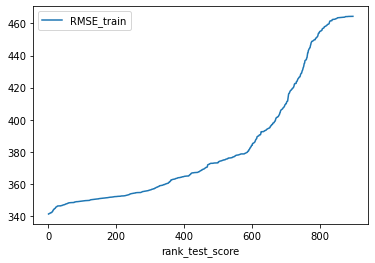

In [59]:
top20 = grid_results.sort_values(by='rank_test_score')
top20.plot(x='rank_test_score',y='RMSE_train')

In [60]:
salary_predict = best_pipe.predict(baseball_test)
print('RMSE')
print(np.sqrt(mean_squared_error(salary_test,salary_predict)))
print('R²')
best_pipe.score(baseball_test,salary_test)

RMSE
371.68475984114485
R²


0.17590057077863164

# Pipeline_by_model for plotting
We have to use the same train/test set to be able to compare the results of the top models

In [153]:
def fitmodel(grid_search,X_train,X_test,y_train,y_test):
    grid_search.fit(X_train,y_train)
    grid_results = pd.DataFrame(grid_search.cv_results_)
    grid_results['RMSE_train'] = np.sqrt(-grid_results['mean_test_score'])
    display(grid_results.sort_values(by='rank_test_score'))
    best_pipe = grid_search.best_estimator_
    print(best_pipe)
    
    print("\nBest hyperparameter test score:")
    salary_pred = best_pipe.predict(baseball_test)
    print("R²",best_pipe.score(baseball_test, salary_test))
    r2 = r2_score(salary_test,salary_pred)
    print(r2)
    mse = mean_squared_error(salary_test,salary_pred)
    rmse = np.sqrt(mse)
    print("Test MSE :",mse)
    print("Test RMSE :",rmse)
    return grid_results,best_pipe

In [62]:
baseball_train, baseball_test, salary_train, salary_test = train_test_split(baseball_dp,salary,random_state=2708)

In [63]:
scaler = StandardScaler()
selector = SelectKBest(mutual_info_regression,k='all')

## Basic linear model
We can vary the selected columns based on the two selectors selectKBest

In [64]:
model_1 = LinearRegression()

param = {'selector__k':[i for i in range(1,17)]}


pipe = Pipeline(steps=[("scaler", scaler), 
                       ("selector", selector), 
                       ("model", model_1)])
                            
grid_search = GridSearchCV(pipe,param,cv=10,scoring='neg_mean_squared_error')

In [65]:
results,best_pipe = fitmodel(grid_search,baseball_train, baseball_test, salary_train, salary_test)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_selector__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,RMSE_train
10,0.019480,0.000099,0.001052,0.000016,11,{'selector__k': 11},-209967.184223,-107590.467470,-62610.057200,-75803.666696,-44811.840341,-95977.332811,-98611.405528,-344242.359608,-137440.922918,-47038.763926,-122409.400072,87199.164864,1,349.870548
9,0.019486,0.000093,0.001052,0.000013,10,{'selector__k': 10},-208719.716406,-107725.459059,-63306.195497,-65965.687975,-48271.447081,-92416.459610,-122065.407943,-336809.227492,-134442.839177,-46776.454775,-122649.889501,85189.292082,2,350.214062
11,0.019524,0.000070,0.001064,0.000027,12,{'selector__k': 12},-205543.815240,-103031.121862,-61885.036287,-73492.303672,-52496.705792,-90886.605349,-92413.250763,-347680.965302,-150541.873426,-49983.600466,-122795.527816,87696.573266,3,350.421928
13,0.019479,0.000065,0.001102,0.000020,14,{'selector__k': 14},-190269.817003,-86933.350162,-66222.669374,-88068.831533,-47089.017131,-112687.286600,-104727.658702,-344288.541476,-154715.223138,-47946.821137,-124294.921626,84890.091620,4,352.554849
12,0.019532,0.000143,0.001149,0.000182,13,{'selector__k': 13},-202840.741488,-100674.645527,-60676.944507,-82718.396275,-56518.126356,-89584.141822,-94282.723781,-346901.318694,-159864.537619,-49569.934019,-124363.151009,86951.172955,5,352.651600
8,0.019980,0.000689,0.001077,0.000040,9,{'selector__k': 9},-242386.797209,-111266.158087,-61045.564565,-67001.138942,-48406.853375,-97912.713633,-124199.735152,-337896.156159,-112404.296055,-44833.872856,-124735.328603,89404.988889,6,353.178890
15,0.019545,0.000125,0.001097,0.000011,16,{'selector__k': 16},-188464.631546,-90210.575161,-62687.668306,-85065.486549,-48447.579154,-129442.196378,-108870.709188,-339252.654520,-158853.967775,-46783.895051,-125807.936363,83676.363698,7,354.694145
14,0.019530,0.000098,0.001103,0.000017,15,{'selector__k': 15},-189452.487785,-86850.131864,-66831.929411,-89222.615344,-47135.385922,-122182.208944,-107260.145195,-344175.692106,-163400.391548,-48971.121109,-126548.210923,84810.150787,8,355.736154
7,0.019504,0.000078,0.001048,0.000010,8,{'selector__k': 8},-241934.373731,-123923.789843,-55301.651465,-67825.141184,-56900.156476,-96878.419141,-131179.625188,-321436.285692,-132941.323383,-40352.121298,-126867.288740,85468.651957,9,356.184347
3,0.019933,0.000677,0.001083,0.000041,4,{'selector__k': 4},-257406.200322,-144948.170752,-73743.481001,-75746.779136,-46022.852139,-96204.675309,-143737.637693,-259334.400680,-124023.702583,-53277.454809,-127444.535442,73164.986090,10,356.993747


Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectKBest(k=11,
                             score_func=<function mutual_info_regression at 0x7fcd8d497670>)),
                ('model', LinearRegression())])

Best hyperparameter test score:
R² 0.17604041588261254
Test MSE : 138126.117483679
Test RMSE : 371.65322208165907


/home/raphael.bouvet@Digital-Grenoble.local/anaconda3/envs/stats_3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


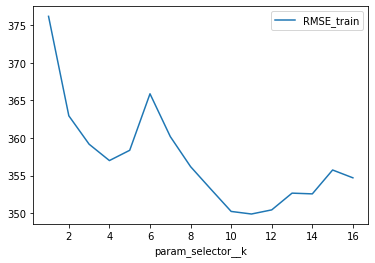

In [66]:
results.plot(kind='line',x='param_selector__k',y='RMSE_train');

In [67]:
feat_names = best_pipe.named_steps['scaler'].feature_names_in_
names_selected = best_pipe.named_steps['selector'].get_feature_names_out(feat_names)
coef_selected = best_pipe.named_steps['model'].coef_
for name,coef in zip(names_selected,coef_selected):
    print(f'{name} : {coef}')

AtBat : -192.30332900385594
Hits : 169.3894978240733
RBI : -14.79835165275399
Walks : 170.25374232688273
Years : -94.85998774596098
CAtBat : -452.9514622192327
CHits : 505.60025655813615
CHmRun : 91.88197768209668
CRuns : 280.27836821405896
CRBI : 43.8708488262198
CWalks : -147.98997007410708


## Ridge/Lasso
the hyper parameter alpha is used for both of these models

In [68]:
alp = [0.00001,0.0001,0.01,0.1,1,10,20,30,40,50,100]

In [69]:
model_2 = Ridge(max_iter=1000)

param = {'selector__k':[i for i in range(1,17)],
        'model__alpha':alp}

pipe = Pipeline(steps=[("scaler", scaler), 
                       ("selector", selector), 
                       ("model", model_2)])
                            
grid_search = GridSearchCV(pipe,param,cv=10,scoring='neg_mean_squared_error')
results,best_pipe = fitmodel(grid_search,baseball_train, baseball_test, salary_train, salary_test)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_selector__k,params,split0_test_score,split1_test_score,split2_test_score,...,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,RMSE_train
75,0.019626,0.000201,0.001072,0.000035,1,12,"{'model__alpha': 1, 'selector__k': 12}",-182469.187199,-105615.842091,-61739.250437,...,-53128.843599,-90526.360371,-98464.239619,-349363.618159,-136031.702170,-41910.370674,-119293.552709,86261.529516,1,345.388988
73,0.019276,0.000519,0.001060,0.000038,1,10,"{'model__alpha': 1, 'selector__k': 10}",-183166.044342,-108269.100285,-62472.333884,...,-52210.702440,-92779.564311,-132395.978025,-340851.918297,-118076.591695,-39345.089896,-119781.539057,84195.763494,2,346.094697
41,0.019343,0.000284,0.001089,0.000041,0.01,10,"{'model__alpha': 0.01, 'selector__k': 10}",-207809.213223,-107748.101673,-62480.703800,...,-41877.929505,-92376.264841,-122257.651102,-336890.616186,-119775.033520,-46661.646154,-120379.241898,85664.512558,3,346.957118
77,0.019597,0.000212,0.001068,0.000025,1,14,"{'model__alpha': 1, 'selector__k': 14}",-166949.372185,-90350.598432,-67020.046782,...,-50609.411489,-109920.215128,-109402.012152,-347693.688711,-137844.638644,-39246.952015,-120667.398399,84051.167381,4,347.372132
74,0.019482,0.000192,0.001059,0.000015,1,11,"{'model__alpha': 1, 'selector__k': 11}",-184482.734672,-108116.312265,-62266.513309,...,-46896.854161,-95087.218861,-125095.895583,-347189.960791,-131395.346966,-39679.812388,-120674.384250,86413.946530,5,347.382188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.019886,0.000560,0.001133,0.000137,40,1,"{'model__alpha': 40, 'selector__k': 1}",-197253.767885,-193056.327692,-121565.332282,...,-85769.281448,-73631.711154,-241116.781289,-281607.644452,-101550.557323,-46345.998218,-143653.253484,74986.528173,172,379.016165
162,0.020191,0.000623,0.001143,0.000029,100,3,"{'model__alpha': 100, 'selector__k': 3}",-195635.684347,-187673.014974,-113106.713470,...,-77005.475635,-79784.580793,-252805.905611,-281090.622847,-115705.782518,-47827.086466,-144324.601139,75803.676984,173,379.900778
161,0.019831,0.000155,0.001134,0.000058,100,2,"{'model__alpha': 100, 'selector__k': 2}",-201172.894310,-197198.486483,-113167.088707,...,-77309.393836,-77569.804155,-252135.694471,-276380.231827,-103877.299862,-49409.794770,-144644.157199,76010.963290,174,380.321124
144,0.020244,0.000368,0.001135,0.000045,50,1,"{'model__alpha': 50, 'selector__k': 1}",-200438.627733,-193068.953701,-123109.693725,...,-88230.715032,-72152.800011,-245924.313394,-279869.068019,-98703.537404,-48669.118130,-144671.844818,75191.269364,175,380.357522


Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectKBest(k=12,
                             score_func=<function mutual_info_regression at 0x7fcd8d497670>)),
                ('model', Ridge(alpha=1, max_iter=1000))])

Best hyperparameter test score:
R² 0.15647428500309757
Test MSE : 141406.1250770853
Test RMSE : 376.04005780911865


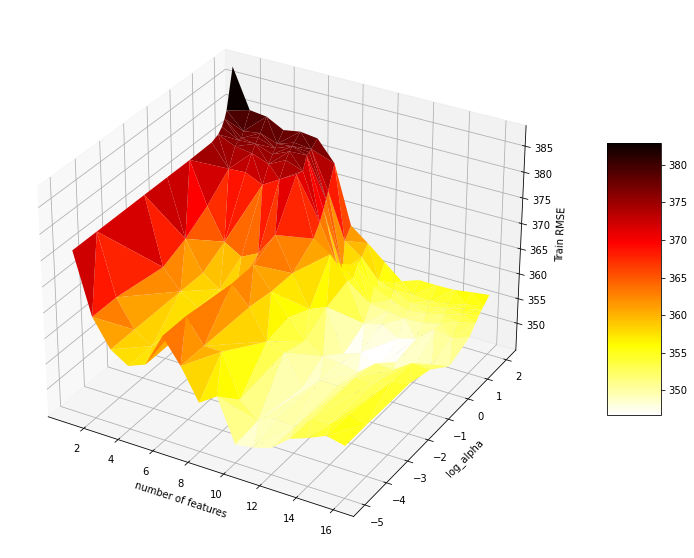

In [70]:
my_cmap = plt.get_cmap('hot_r')

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
trisurf = ax.plot_trisurf(
    results.param_selector__k,
    np.log10(results.param_model__alpha.astype(float)),
    results.RMSE_train,
cmap=my_cmap)
ax.set_xlabel('number of features')
ax.set_ylabel('log_alpha')
ax.set_zlabel('Train RMSE');
fig.colorbar(trisurf, ax = ax, shrink = 0.5, aspect = 5);

In [71]:
feat_names = best_pipe.named_steps['scaler'].feature_names_in_
names_selected = best_pipe.named_steps['selector'].get_feature_names_out(feat_names)
coef_selected = best_pipe.named_steps['model'].coef_
for name,coef in zip(names_selected,coef_selected):
    print(f'{name} : {coef}')

AtBat : -199.78031565009334
Hits : 167.53175677255985
HmRun : -65.64115530827677
RBI : 49.1126964373626
Walks : 167.70859739829078
Years : -107.27412905182358
CAtBat : -178.7746953000143
CHits : 229.27679278465556
CHmRun : 116.92495331712816
CRuns : 298.6327312353399
CRBI : 26.025507855912586
CWalks : -157.86478212739175


In [72]:
model_3 = Lasso(max_iter=10000)

param = {'selector__k':[i for i in range(1,17)],
        'model__alpha':alp}

pipe = Pipeline(steps=[("scaler", scaler), 
                       ("selector", selector), 
                       ("model", model_3)])
                            
grid_search = GridSearchCV(pipe,param,cv=10,scoring='neg_mean_squared_error')
results,best_pipe = fitmodel(grid_search,baseball_train, baseball_test, salary_train, salary_test)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_selector__k,params,split0_test_score,split1_test_score,split2_test_score,...,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,RMSE_train
74,0.020201,0.000485,0.001099,0.000057,1,11,"{'model__alpha': 1, 'selector__k': 11}",-194929.554004,-109487.139239,-61982.543299,...,-43605.379960,-89120.942928,-102988.851376,-349211.139647,-118517.483350,-43354.590769,-117895.861953,88023.903430,1,343.359669
73,0.021198,0.000820,0.001202,0.000050,1,10,"{'model__alpha': 1, 'selector__k': 10}",-193608.929657,-109487.264669,-62111.913897,...,-50707.826562,-92731.537117,-105685.037167,-343529.028070,-116910.905335,-42024.785295,-118199.795885,85822.590674,2,343.801972
42,0.027187,0.004510,0.001664,0.000379,0.01,11,"{'model__alpha': 0.01, 'selector__k': 11}",-209763.548843,-107595.287287,-62591.825274,...,-56594.131112,-95953.967116,-98680.036281,-344300.004748,-120289.326546,-46983.519161,-120960.751757,86612.457063,3,347.794123
75,0.021530,0.001772,0.001189,0.000079,1,12,"{'model__alpha': 1, 'selector__k': 12}",-190275.764900,-106707.720578,-61742.156995,...,-52643.744468,-90985.082470,-102799.970318,-351941.095580,-137685.157726,-43330.888210,-121073.496017,87409.682146,4,347.956170
10,0.025267,0.000953,0.001188,0.000049,0.00001,11,"{'model__alpha': 1e-05, 'selector__k': 11}",-209966.980447,-107590.472114,-62610.038866,...,-41842.203902,-95977.309263,-98611.473944,-344242.416933,-137440.871155,-47038.708640,-121218.883013,87980.209100,5,348.165023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.019471,0.000480,0.001089,0.000044,100,4,"{'model__alpha': 100, 'selector__k': 4}",-214449.657902,-183670.762643,-115262.438230,...,-90145.451793,-78931.273330,-272451.912512,-268557.003232,-104440.490519,-59854.508541,-148982.204798,75277.914267,172,385.982130
164,0.019491,0.000326,0.001118,0.000080,100,5,"{'model__alpha': 100, 'selector__k': 5}",-214449.657902,-183670.762643,-115262.438230,...,-90145.451793,-79344.652165,-272451.912512,-268557.003232,-104440.490519,-59854.508541,-149023.542682,75239.539082,173,386.035675
165,0.019283,0.000424,0.001073,0.000042,100,6,"{'model__alpha': 100, 'selector__k': 6}",-215052.480685,-183670.814091,-115262.368347,...,-89895.771815,-84426.988115,-272451.912512,-268557.189423,-114016.711139,-59854.524411,-150524.695244,74331.376922,174,387.975122
166,0.019588,0.000455,0.001137,0.000070,100,7,"{'model__alpha': 100, 'selector__k': 7}",-215052.446401,-183670.825108,-115262.389005,...,-89895.850435,-84426.877775,-272451.912512,-268208.807755,-114016.547715,-60531.617239,-150607.650740,74161.120147,175,388.082015


Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectKBest(k=11,
                             score_func=<function mutual_info_regression at 0x7fcd8d497670>)),
                ('model', Lasso(alpha=1, max_iter=10000))])

Best hyperparameter test score:
R² 0.19195827895966633
Test MSE : 135457.69458060007
Test RMSE : 368.045777832867


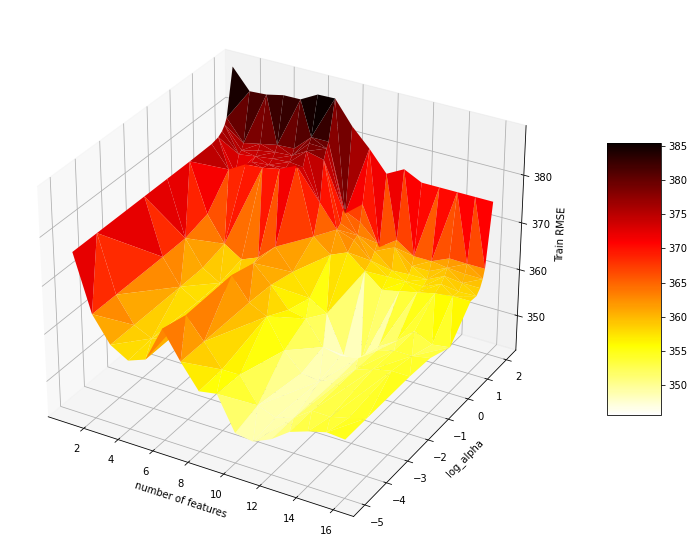

In [73]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')

trisurf = ax.plot_trisurf(
    results.param_selector__k,
    np.log10(results.param_model__alpha.astype(float)),
    results.RMSE_train,
    cmap=my_cmap)
ax.set_xlabel('number of features')
ax.set_ylabel('log_alpha')
ax.set_zlabel('Train RMSE')
fig.colorbar(trisurf, ax = ax, shrink = 0.5, aspect = 5);

In [74]:
feat_names = best_pipe.named_steps['scaler'].feature_names_in_
names_selected = best_pipe.named_steps['selector'].get_feature_names_out(feat_names)
coef_selected = best_pipe.named_steps['model'].coef_
for name,coef in zip(names_selected,coef_selected):
    print(f'{name} : {coef}')

AtBat : -201.66440366147987
Hits : 177.85125164535785
RBI : -6.08951018104346
Walks : 168.11717663133203
Years : -106.71509191552052
CAtBat : -200.8482891634243
CHits : 239.9683583440173
CHmRun : 65.19151024494197
CRuns : 306.15114578411396
CRBI : 74.68291267399734
CWalks : -160.50854061424872


## ElasticNet
Elastic net uses both alpha and a ratio corresponding to the ratio of l2/l1 norm as well as an alpha hyperparameter

In [75]:
model_4 = ElasticNet(max_iter=10000)
alp = [0.00001,0.0001,0.01,0.1,1,10,100]
ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

param = {'selector__k':[i for i in range(1,17)],
        'model__alpha':alp,
        'model__l1_ratio':ratio}

pipe = Pipeline(steps=[("scaler", scaler), 
                       ("selector", selector), 
                       ("model", model_4)])
grid_search = GridSearchCV(pipe,param,cv=10,scoring='neg_mean_squared_error')
results,best_pipe = fitmodel(grid_search,baseball_train, baseball_test, salary_train, salary_test)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__l1_ratio,param_selector__k,params,split0_test_score,split1_test_score,...,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,RMSE_train
329,0.019826,0.000179,0.001061,0.000023,0.01,0.3,10,"{'model__alpha': 0.01, 'model__l1_ratio': 0.3,...",-180939.286783,-108417.387567,...,-53024.137270,-93057.726020,-105258.961228,-341537.335294,-117826.183254,-38331.443369,-116675.875153,84353.165608,1,341.578505
521,0.020123,0.000670,0.001181,0.000266,0.1,0.6,10,"{'model__alpha': 0.1, 'model__l1_ratio': 0.6, ...",-163603.188759,-113254.630360,...,-47907.000394,-98158.971860,-122229.459808,-351431.153778,-118830.203658,-31202.501821,-117384.891291,86814.325542,2,342.614786
346,0.020215,0.000393,0.001114,0.000075,0.01,0.4,11,"{'model__alpha': 0.01, 'model__l1_ratio': 0.4,...",-183831.396226,-105822.485548,...,-47023.544742,-95128.476989,-104109.116139,-347351.010747,-119068.741673,-39373.724725,-117933.965677,85990.883866,3,343.415151
570,0.020080,0.000888,0.001085,0.000052,0.1,0.9,11,"{'model__alpha': 0.1, 'model__l1_ratio': 0.9, ...",-177905.676443,-107933.357024,...,-48272.476868,-95723.209651,-107584.763488,-348980.631623,-129138.015639,-36816.767962,-118152.908385,86567.075249,4,343.733775
537,0.020081,0.000222,0.001145,0.000037,0.1,0.7,10,"{'model__alpha': 0.1, 'model__l1_ratio': 0.7, ...",-165865.954996,-111878.755519,...,-61440.926108,-97031.084389,-118472.116478,-349292.980803,-118244.858361,-31995.425287,-118189.948575,85282.910113,5,343.787650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,0.019224,0.000525,0.001055,0.000042,100,0.5,1,"{'model__alpha': 100, 'model__l1_ratio': 0.5, ...",-299499.398142,-262220.863157,...,-178527.414546,-102829.189986,-421508.468430,-280673.935642,-107363.713822,-129861.927739,-213277.225579,96086.150651,1004,461.819473
912,0.019715,0.000519,0.001133,0.000059,100,0.4,1,"{'model__alpha': 100, 'model__l1_ratio': 0.4, ...",-299843.309602,-262579.289489,...,-178857.760333,-103073.200554,-422137.626089,-280775.326173,-107568.794762,-130153.657295,-213576.627823,96171.095474,1005,462.143514
896,0.020706,0.001438,0.001206,0.000207,100,0.3,1,"{'model__alpha': 100, 'model__l1_ratio': 0.3, ...",-300090.607019,-262837.322079,...,-179095.355477,-103249.012102,-422590.122747,-280848.489437,-107716.715778,-130363.464697,-213792.082379,96232.194963,1006,462.376559
880,0.019022,0.000099,0.001038,0.000008,100,0.2,1,"{'model__alpha': 100, 'model__l1_ratio': 0.2, ...",-300276.988177,-263031.958284,...,-179274.453211,-103381.709402,-422931.204489,-280903.771725,-107828.449388,-130521.608638,-213954.554056,96278.253837,1007,462.552218


Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectKBest(score_func=<function mutual_info_regression at 0x7fcd8d497670>)),
                ('model',
                 ElasticNet(alpha=0.01, l1_ratio=0.3, max_iter=10000))])

Best hyperparameter test score:
R² 0.1986894805650582
Test MSE : 134329.29609883638
Test RMSE : 366.5096125599387


In [76]:
dic = {'param_model__alpha':'float64',
       'param_model__l1_ratio':'float64',
       'param_selector__k':'int32'
}

results = results.astype(dic)

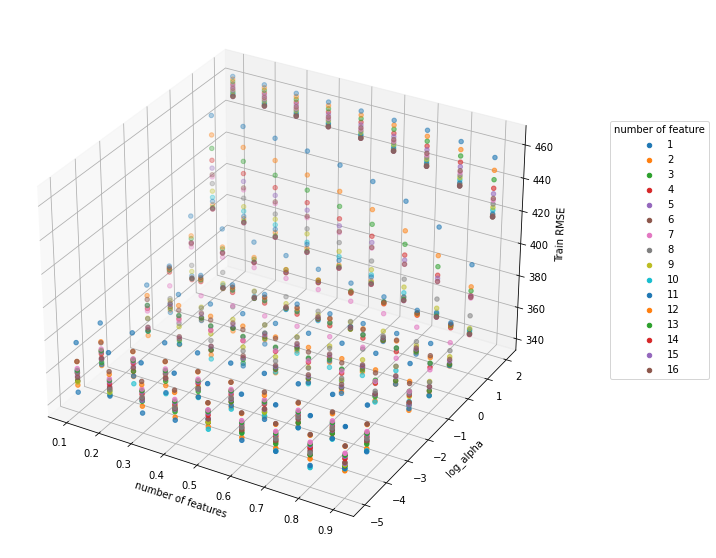

In [77]:
groups = results.groupby('param_selector__k')

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('number of features')
ax.set_ylabel('log_alpha')
ax.set_zlabel('Train RMSE');

for name,group in groups:
    ax.scatter3D(group.param_model__l1_ratio,
                 np.log10(group.param_model__alpha),
                 group['RMSE_train'],
                label=f'{name}')
plt.legend(loc='best',bbox_to_anchor=(1.3,0.8),title='number of feature');


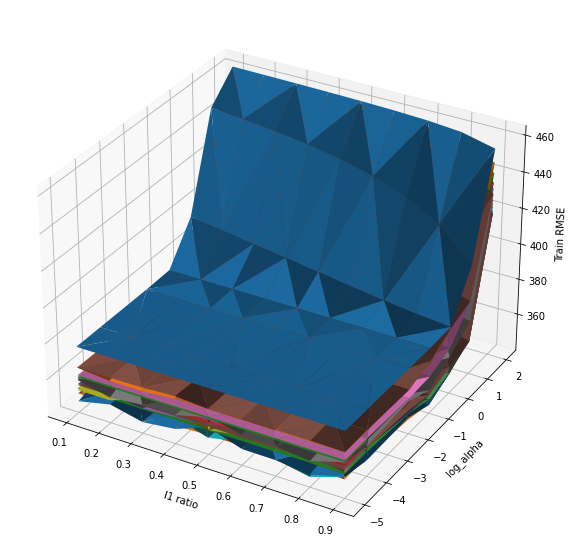

In [78]:
groups = results.groupby('param_selector__k')[['param_model__l1_ratio','param_model__alpha','RMSE_train']]

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('l1 ratio')
ax.set_ylabel('log_alpha')
ax.set_zlabel('Train RMSE');

for name,group in groups:
    x = group['param_model__l1_ratio']
    y = np.log10(group['param_model__alpha'])
    z = group['RMSE_train']
    surf = ax.plot_trisurf(x,
                 y,
                 z,
                label=f'{name}')

In [79]:
feat_names = best_pipe.named_steps['scaler'].feature_names_in_
names_selected = best_pipe.named_steps['selector'].get_feature_names_out(feat_names)
coef_selected = best_pipe.named_steps['model'].coef_
for name,coef in zip(names_selected,coef_selected):
    print(f'{name} : {coef}')

AtBat : -201.03132104737307
Hits : 174.8186185185866
Walks : 166.76444053765317
Years : -113.08012767575278
CAtBat : -145.83514370296012
CHits : 205.57490504246428
CHmRun : 61.288859432219816
CRuns : 281.41226393910716
CRBI : 82.29632693809535
CWalks : -155.94941459033586


### Ridge/Lasso/Elastic without selector

In [80]:
model_4 = ElasticNet(max_iter=10000)
param_elastic = {'model__alpha':alp,
        'model__l1_ratio':ratio}
pipe_elastic = Pipeline(steps=[("scaler", scaler), 
                       ("model", model_4)])

grid_search = GridSearchCV(pipe_elastic,param_elastic,cv=10,scoring='neg_mean_squared_error')
results,best_pipe = fitmodel(grid_search,baseball_train, baseball_test, salary_train, salary_test)

feat_names = best_pipe.named_steps['scaler'].feature_names_in_
coef_selected = best_pipe.named_steps['model'].coef_

for i ,(name,coef) in enumerate(zip(feat_names,coef_selected)):
    print(f' {i} {name} : {coef}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,RMSE_train
18,0.003643,0.000045,0.000920,0.000018,0.01,0.1,"{'model__alpha': 0.01, 'model__l1_ratio': 0.1}",-159530.789532,-95811.943968,-65144.725783,...,-53190.576828,-121088.268140,-117539.570898,-347242.232208,-138322.860313,-37911.360461,-122184.108514,83333.782030,1,349.548435
35,0.002992,0.000082,0.000930,0.000023,0.1,0.9,"{'model__alpha': 0.1, 'model__l1_ratio': 0.9}",-158323.363349,-96506.436673,-65385.815574,...,-53429.032911,-120971.152972,-119010.840099,-348195.441159,-136804.962196,-37269.291060,-122189.581932,83513.460494,2,349.556264
19,0.003679,0.000112,0.000938,0.000020,0.01,0.2,"{'model__alpha': 0.01, 'model__l1_ratio': 0.2}",-160714.170325,-95259.320408,-64975.656871,...,-52867.005294,-121107.736505,-116737.469520,-346649.762262,-139590.885364,-38403.672357,-122230.009928,83267.437575,3,349.614087
20,0.003390,0.000153,0.000932,0.000031,0.01,0.3,"{'model__alpha': 0.01, 'model__l1_ratio': 0.3}",-162062.062162,-94681.382749,-64785.923846,...,-52502.902962,-121158.601790,-115905.558667,-346021.127988,-141026.719510,-38963.769572,-122301.616629,83208.553971,4,349.716480
21,0.003494,0.000057,0.000965,0.000063,0.01,0.4,"{'model__alpha': 0.01, 'model__l1_ratio': 0.4}",-163611.187818,-94077.093207,-64574.533975,...,-52090.404186,-121255.264281,-115048.028694,-345349.377267,-142658.713059,-39605.455268,-122406.827858,83159.245683,5,349.866872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.002231,0.000120,0.000963,0.000078,100,0.5,"{'model__alpha': 100, 'model__l1_ratio': 0.5}",-282451.523559,-245026.247644,-167488.569962,...,-160620.912095,-92143.816078,-389853.933855,-277406.242088,-98805.976164,-115204.209023,-198253.270735,92011.906572,59,445.256410
57,0.002161,0.000018,0.000921,0.000019,100,0.4,"{'model__alpha': 100, 'model__l1_ratio': 0.4}",-284314.929101,-246930.563596,-169069.500712,...,-162543.440545,-93276.128620,-393283.415011,-277733.442580,-99728.651632,-116851.910107,-199881.509595,92437.795537,60,447.081100
56,0.002195,0.000041,0.000933,0.000034,100,0.3,"{'model__alpha': 100, 'model__l1_ratio': 0.3}",-285705.041895,-248368.318391,-170248.914012,...,-163979.562325,-94136.882299,-395841.135815,-277994.830861,-100434.389815,-118082.957440,-201103.484803,92756.465174,61,448.445632
55,0.002176,0.000050,0.000915,0.000008,100,0.2,"{'model__alpha': 100, 'model__l1_ratio': 0.2}",-286781.825754,-249498.637082,-171162.510509,...,-165102.168267,-94812.877257,-397838.998083,-278216.197354,-100997.233962,-119037.609766,-202059.031159,93007.462039,62,449.509768


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 ElasticNet(alpha=0.01, l1_ratio=0.1, max_iter=10000))])

Best hyperparameter test score:
R² 0.24115438240392462
Test MSE : 127210.6071080272
Test RMSE : 356.6659601195875
 0 AtBat : -219.10046815428666
 1 Hits : 187.107498172537
 2 HmRun : -54.56074966647589
 3 Runs : -13.646440562842383
 4 RBI : 39.25627727756898
 5 Walks : 150.97099098274427
 6 Years : -107.89275662166419
 7 CAtBat : -160.4899892972226
 8 CHits : 184.76047061970445
 9 CHmRun : 110.27025837551858
 10 CRuns : 328.27241783020384
 11 CRBI : 27.052906790196594
 12 CWalks : -150.8065920515881
 13 PutOuts : 60.25197471446996
 14 Assists : 35.0605261781166
 15 Errors : -19.358507683469597


In [81]:
param_rl = {'model__alpha':alp}

model_2 = Ridge(max_iter=10000)
model_3 = Lasso(max_iter=10000)

pipe_ridge = Pipeline(steps=[("scaler", scaler),("model", model_2)])
pipe_lasso = Pipeline(steps=[("scaler", scaler),("model", model_3)])

grid_search = GridSearchCV(pipe_ridge,param_rl,cv=10,scoring='neg_mean_squared_error')
results,best_pipe = fitmodel(grid_search,baseball_train, baseball_test, salary_train, salary_test)

for i ,(name,coef) in enumerate(zip(feat_names,coef_selected)):
    print(f' {i} {name} : {coef}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,RMSE_train
4,0.002254,0.000031,0.000953,0.000017,1,{'model__alpha': 1},-164232.924243,-93852.753731,-64490.199684,-85758.349664,-51933.328000,-121312.995079,-114708.776286,-345059.414593,-143367.153917,-39889.909324,-122460.580452,83133.445442,1,349.943682
5,0.002243,0.000028,0.000968,0.000023,10,{'model__alpha': 10},-146473.869653,-108611.358755,-66838.352681,-82262.631782,-54789.356806,-123050.609160,-137989.640603,-360065.592700,-125110.043360,-32408.999344,-123760.045484,86518.554841,2,351.795460
3,0.002292,0.000081,0.000965,0.000025,0.1,{'model__alpha': 0.1},-181961.147411,-90512.308489,-62852.576328,-84881.734224,-48712.718565,-126010.341636,-109724.564787,-340187.504934,-156947.199216,-45858.660411,-124764.875600,83396.009696,3,353.220718
2,0.002429,0.000283,0.001022,0.000077,0.01,{'model__alpha': 0.01},-187595.642939,-90230.825726,-62696.454382,-85025.955671,-48458.965671,-128938.045052,-108972.552810,-339359.401237,-158677.987154,-46700.990462,-125665.682110,83635.008516,4,354.493557
1,0.002528,0.000346,0.000992,0.000037,0.0001,{'model__alpha': 0.0001},-188455.573062,-90210.753944,-62687.740523,-85065.054700,-48447.666184,-129436.877699,-108871.754389,-339253.742492,-158852.237233,-46783.086570,-125806.448679,83675.926659,5,354.692048
0,0.002689,0.000423,0.001161,0.000305,0.00001,{'model__alpha': 1e-05},-188463.725344,-90210.593015,-62687.675512,-85065.443329,-48447.587831,-129441.664244,-108870.813733,-339252.763337,-158853.794749,-46783.814223,-125807.787532,83676.319971,6,354.693935
6,0.002232,0.000022,0.000957,0.000018,100,{'model__alpha': 100},-158196.524558,-134054.276921,-70618.830151,-65844.271265,-50093.066212,-114045.503585,-172675.944744,-357265.753801,-114201.575546,-34322.471538,-127131.821832,88252.875513,7,356.555496


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', Ridge(alpha=1, max_iter=10000))])

Best hyperparameter test score:
R² 0.23596221156463137
Test MSE : 128081.00708051102
Test RMSE : 357.88406933043416
 0 AtBat : -219.10046815428666
 1 Hits : 187.107498172537
 2 HmRun : -54.56074966647589
 3 Runs : -13.646440562842383
 4 RBI : 39.25627727756898
 5 Walks : 150.97099098274427
 6 Years : -107.89275662166419
 7 CAtBat : -160.4899892972226
 8 CHits : 184.76047061970445
 9 CHmRun : 110.27025837551858
 10 CRuns : 328.27241783020384
 11 CRBI : 27.052906790196594
 12 CWalks : -150.8065920515881
 13 PutOuts : 60.25197471446996
 14 Assists : 35.0605261781166
 15 Errors : -19.358507683469597


In [82]:
grid_search = GridSearchCV(pipe_lasso,param_rl,cv=10,scoring='neg_mean_squared_error')
results,best_pipe = fitmodel(grid_search,baseball_train, baseball_test, salary_train, salary_test)
for i ,(name,coef) in enumerate(zip(feat_names,coef_selected)):
    print(f' {i} {name} : {coef}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,RMSE_train
4,0.003599,0.000312,0.000918,0.000007,1,{'model__alpha': 1},-175488.402555,-93105.171621,-64095.885229,-84450.532634,-48624.196520,-121680.623754,-116906.796486,-347346.463535,-147096.184864,-42607.160493,-124140.141769,84579.600733,1,352.335269
3,0.004690,0.000475,0.000952,0.000064,0.1,{'model__alpha': 0.1},-186970.249020,-90257.025200,-62796.586778,-84767.333758,-48226.462496,-128318.871119,-109393.541616,-340138.286724,-157961.432578,-46276.150406,-125510.593969,83815.181504,2,354.274744
2,0.006751,0.000681,0.001072,0.000131,0.01,{'model__alpha': 0.01},-188324.756252,-90213.503906,-62697.377331,-85025.397891,-48424.729054,-129317.770205,-108898.683128,-339335.668324,-158761.863508,-46731.773215,-125773.152282,83690.476255,3,354.645108
1,0.010302,0.000700,0.001147,0.000150,0.0001,{'model__alpha': 0.0001},-188463.231338,-90210.602528,-62687.764048,-85065.085765,-48447.349741,-129440.948967,-108870.984463,-339253.476991,-158853.043144,-46783.372156,-125807.585914,83676.502866,4,354.693651
0,0.011885,0.000871,0.000994,0.000077,0.00001,{'model__alpha': 1e-05},-188464.491522,-90210.577898,-62687.677880,-85065.446471,-48447.556211,-129442.071631,-108870.736715,-339252.736752,-158853.875295,-46783.842761,-125807.901314,83676.377609,5,354.694095
5,0.002512,0.000230,0.000915,0.000006,10,{'model__alpha': 10},-151479.855732,-116935.997671,-65964.994230,-72792.328211,-45547.473651,-124960.084484,-166366.859065,-371575.117226,-136292.856817,-30464.190461,-128237.975755,92065.138801,6,358.103303
6,0.002228,0.000048,0.000919,0.000017,100,{'model__alpha': 100},-195906.787619,-161457.044904,-97614.842057,-92348.961512,-78284.697465,-84150.206757,-246631.462610,-299723.487096,-102733.627293,-49339.674208,-140819.079152,78143.652450,7,375.258683


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', Lasso(alpha=1, max_iter=10000))])

Best hyperparameter test score:
R² 0.23178753377542594
Test MSE : 128780.8375647768
Test RMSE : 358.8604708863555
 0 AtBat : -219.10046815428666
 1 Hits : 187.107498172537
 2 HmRun : -54.56074966647589
 3 Runs : -13.646440562842383
 4 RBI : 39.25627727756898
 5 Walks : 150.97099098274427
 6 Years : -107.89275662166419
 7 CAtBat : -160.4899892972226
 8 CHits : 184.76047061970445
 9 CHmRun : 110.27025837551858
 10 CRuns : 328.27241783020384
 11 CRBI : 27.052906790196594
 12 CWalks : -150.8065920515881
 13 PutOuts : 60.25197471446996
 14 Assists : 35.0605261781166
 15 Errors : -19.358507683469597


# Modélisation avec prise en compte des variables catégorielles

In [154]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.metrics import r2_score

In [155]:
baseball = pd.read_csv('data/Hitters.csv')
baseball = baseball.dropna(how='any')
dic = {'League':'category','Division':'category','NewLeague':'category'}
baseball = baseball.astype(dic)
baseball = baseball.drop(['Unnamed: 0'],axis=1)

In [156]:
baseball.dtypes

AtBat           int64
Hits            int64
HmRun           int64
Runs            int64
RBI             int64
Walks           int64
Years           int64
CAtBat          int64
CHits           int64
CHmRun          int64
CRuns           int64
CRBI            int64
CWalks          int64
League       category
Division     category
PutOuts         int64
Assists         int64
Errors          int64
Salary        float64
NewLeague    category
dtype: object

In [157]:
salary = baseball.pop('Salary')

In [158]:
baseball_train, baseball_test, salary_train, salary_test = train_test_split(baseball,salary,random_state=2708)

In [159]:
categorical_transformer = OneHotEncoder(drop='first')
numerical_transformer = StandardScaler()

transformer = ColumnTransformer(
[("num_trans", numerical_transformer, make_column_selector(dtype_exclude="category")),
("cat_trans", categorical_transformer, make_column_selector(dtype_include='category'))])

selector= SelectKBest(mutual_info_regression,k='all')

model_4 = ElasticNet(max_iter=100000)
alp = [0.0001,0.01,0.1,1,10,100,1000]
ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


param = {'selector__k':[i for i in range(1,19)],
        'model__alpha':alp,
        'model__l1_ratio':ratio}

pipe = Pipeline(steps=[("transformer", transformer), 
                       ("selector", selector), 
                       ("model", model_4)])


grid_search = GridSearchCV(pipe,param,cv=10,scoring='neg_mean_squared_error')


In [160]:
results,best_pipe = fitmodel(grid_search,baseball_train, baseball_test, salary_train, salary_test)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__l1_ratio,param_selector__k,params,split0_test_score,split1_test_score,...,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,RMSE_train
262,0.025739,0.000187,0.002919,0.000051,0.01,0.6,11,"{'model__alpha': 0.01, 'model__l1_ratio': 0.6,...",-187936.115400,-107964.945694,...,-43085.738527,-88329.209274,-98319.026329,-346532.301131,-119394.742836,-41101.200800,-116119.072448,87041.795186,1,340.762487
171,0.025737,0.000351,0.002937,0.000092,0.01,0.1,10,"{'model__alpha': 0.01, 'model__l1_ratio': 0.1,...",-178286.808459,-108666.581386,...,-53667.548734,-93463.373133,-106694.556581,-342432.516478,-117586.454841,-37156.543935,-116607.164283,84439.859582,2,341.477912
207,0.025453,0.000239,0.003010,0.000310,0.01,0.3,10,"{'model__alpha': 0.01, 'model__l1_ratio': 0.3,...",-180939.286783,-108417.387567,...,-53024.137270,-93057.726020,-105258.961228,-341537.335294,-117826.183254,-38331.443369,-116648.988592,84370.387266,3,341.539147
244,0.025770,0.000468,0.002924,0.000086,0.01,0.5,11,"{'model__alpha': 0.01, 'model__l1_ratio': 0.5,...",-185711.769292,-108054.007481,...,-46670.116718,-88540.652667,-103331.854775,-350638.587924,-119213.363075,-40173.142474,-117103.055588,87630.997557,4,342.203237
478,0.025226,0.000190,0.003002,0.000413,0.1,0.9,11,"{'model__alpha': 0.1, 'model__l1_ratio': 0.9, ...",-177905.676443,-108814.013823,...,-48272.476868,-95723.209651,-103501.480424,-352961.778184,-118642.411738,-36816.767962,-117181.200024,87606.068243,5,342.317397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,0.025157,0.000680,0.002932,0.000172,1000,0.5,10,"{'model__alpha': 1000, 'model__l1_ratio': 0.5,...",-302223.255765,-265080.178923,...,-181180.587670,-104758.082564,-426620.948097,-281475.114732,-108982.501522,-132197.163408,-215670.754549,96787.584131,1025,464.403655
1052,0.025481,0.001951,0.003028,0.000447,1000,0.5,9,"{'model__alpha': 1000, 'model__l1_ratio': 0.5,...",-302223.255765,-265080.178923,...,-181180.587670,-104758.082564,-426620.948097,-281475.114732,-108982.501522,-132197.163408,-215670.754549,96787.584131,1025,464.403655
1051,0.025048,0.000667,0.003049,0.000284,1000,0.5,8,"{'model__alpha': 1000, 'model__l1_ratio': 0.5,...",-302223.255765,-265080.178923,...,-181180.587670,-104758.082564,-426620.948097,-281475.114732,-108982.501522,-132197.163408,-215670.754549,96787.584131,1025,464.403655
1062,0.025142,0.001039,0.002973,0.000238,1000,0.6,1,"{'model__alpha': 1000, 'model__l1_ratio': 0.6,...",-302223.255765,-265080.178923,...,-181180.587670,-104758.082564,-426620.948097,-281475.114732,-108982.501522,-132197.163408,-215670.754549,96787.584131,1025,464.403655


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num_trans', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcd7c8923d0>),
                                                 ('cat_trans',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcd7c892340>)])),
                ('selector',
                 SelectKBest(k=11,
                             score_func=<function mutual_info_regression at 0x7fcd8d497670>)),
                ('model',
                 ElasticNet(alpha=0.01, l1_ratio=0.6, max_iter=100000))])

Best hyperparameter test score:
R² 0.19352633819063236
0.19352633819063236
Test MSE : 135194.8298263903
Test RMSE : 367.6884956405222


In [161]:
categorical_transformer = OneHotEncoder(drop='first')
numerical_transformer = StandardScaler()

transformer = ColumnTransformer(
[("cat_trans", categorical_transformer, make_column_selector(dtype_include="category")),
("num_trans", numerical_transformer, make_column_selector(dtype_exclude='category'))])

selector= SelectKBest(mutual_info_regression,k='all')

model = Ridge(max_iter=100000)
alp = [0.0001,0.01,0.1,1,10,100,1000]
ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


param = {'selector__k':[i for i in range(1,20)],
        'model__alpha':alp}

pipe = Pipeline(steps=[("transformer", transformer), 
                       ("selector", selector), 
                       ("model", model)])


grid_search = GridSearchCV(pipe,param,cv=10,scoring='neg_mean_squared_error')

In [162]:
results,best_pipe = fitmodel(grid_search,baseball_train, baseball_test, salary_train, salary_test)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_selector__k,params,split0_test_score,split1_test_score,split2_test_score,...,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,RMSE_train
68,0.026542,0.001760,0.003052,0.000178,1,12,"{'model__alpha': 1, 'selector__k': 12}",-178922.100607,-105615.842091,-61739.250437,...,-53128.843599,-90526.360371,-98464.239619,-347804.685778,-136031.702170,-40519.502782,-118643.864022,85716.389169,1,344.447186
28,0.024570,0.000100,0.002836,0.000050,0.01,10,"{'model__alpha': 0.01, 'selector__k': 10}",-207809.213223,-107748.101673,-63229.972354,...,-48311.497352,-92376.264841,-99101.274494,-336890.616186,-119775.033520,-46661.646154,-118781.887877,85295.308925,2,344.647483
69,0.025853,0.000763,0.003004,0.000147,1,13,"{'model__alpha': 1, 'selector__k': 13}",-179582.278346,-103412.818034,-60978.427140,...,-58895.133032,-89569.699571,-100945.386297,-349575.085289,-126601.084080,-41998.735509,-119363.929047,85204.423556,3,345.490852
89,0.025628,0.000567,0.003025,0.000269,10,14,"{'model__alpha': 10, 'selector__k': 14}",-146295.926001,-119289.852437,-67210.629382,...,-58872.638836,-96408.379166,-112582.107225,-347966.143711,-127659.026802,-40095.975359,-119786.928907,82293.007815,4,346.102483
87,0.025979,0.000655,0.003024,0.000095,10,12,"{'model__alpha': 10, 'selector__k': 12}",-156911.381971,-118571.354354,-62113.697608,...,-56724.033277,-98873.942110,-122233.401348,-359936.842241,-126032.945229,-31394.777368,-120298.212866,87810.935009,5,346.840328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.025015,0.000375,0.002939,0.000133,1000,5,"{'model__alpha': 1000, 'selector__k': 5}",-233633.933236,-203686.624520,-136786.820987,...,-115468.394434,-78698.398441,-304664.547938,-268858.669865,-92901.646593,-77599.992207,-163263.573301,78739.445582,129,404.058874
117,0.025228,0.000786,0.002902,0.000083,1000,4,"{'model__alpha': 1000, 'selector__k': 4}",-241839.775520,-207874.945835,-141390.854077,...,-122124.977295,-79858.980590,-313753.043047,-268792.904154,-88917.048420,-81531.803295,-167006.638476,80427.271990,130,408.664457
116,0.025133,0.000639,0.002935,0.000063,1000,3,"{'model__alpha': 1000, 'selector__k': 3}",-250419.987348,-216715.939137,-148451.433222,...,-128131.668361,-77643.007337,-335762.123984,-269965.614187,-88701.621930,-88853.868373,-173457.684276,84585.527509,131,416.482514
115,0.024998,0.000585,0.002878,0.000086,1000,2,"{'model__alpha': 1000, 'selector__k': 2}",-262039.639202,-224226.207467,-154712.910540,...,-137353.543536,-81978.637301,-352020.609219,-270104.075386,-91543.816860,-96939.661382,-180884.953151,86572.612497,132,425.305717


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat_trans',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcd7d191280>),
                                                 ('num_trans', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcd7d1911f0>)])),
                ('selector',
                 SelectKBest(k=12,
                             score_func=<function mutual_info_regression at 0x7fcd8d497670>)),
                ('model', Ridge(alpha=1, max_iter=100000))])

Best hyperparameter test score:
R² 0.15647428500309757
0.15647428500309757
Test MSE : 141406.1250770853
Test RMSE : 376.04005780911865


In [163]:
best_pipe.score(baseball_test,salary_test)

0.15647428500309757

In [164]:
categorical_transformer = OneHotEncoder(drop='first')
numerical_transformer = StandardScaler()

transformer = ColumnTransformer(
[("cat_trans", categorical_transformer, make_column_selector(dtype_include="category")),
("num_trans", numerical_transformer, make_column_selector(dtype_exclude='category'))])

selector= SelectKBest(mutual_info_regression,k='all')

model = Ridge(max_iter=100000)
alp = [0.0001,0.01,0.1,1,10,100,1000]
ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


param = {'model__alpha':alp}

pipe = Pipeline(steps=[("transformer", transformer),  
                       ("model", model)])


grid_search = GridSearchCV(pipe,param,cv=10,scoring='neg_mean_squared_error')

In [165]:
results,best_pipe = fitmodel(grid_search,baseball_train, baseball_test, salary_train, salary_test)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,RMSE_train
4,0.005052,0.000066,0.002650,0.000020,10,{'model__alpha': 10},-138554.518912,-113370.332623,-70808.169535,-98855.575868,-52018.712770,-124742.693995,-129730.803824,-347468.168715,-126174.485686,-42550.431834,-124427.389376,80979.066749,1,352.742667
3,0.005100,0.000137,0.002725,0.000166,1,{'model__alpha': 1},-156851.741051,-101230.985464,-70120.384632,-103652.665308,-50671.002099,-125148.297791,-108294.224541,-332310.400722,-147154.184446,-50361.003682,-124579.488974,77387.664914,2,352.958197
5,0.005099,0.000122,0.002764,0.000220,100,{'model__alpha': 100},-153817.342837,-134802.753969,-72211.844213,-71231.876029,-48292.546356,-113009.735445,-169395.995326,-351155.672984,-113623.077959,-37517.764069,-126505.860919,85737.521705,3,355.676624
2,0.005151,0.000096,0.002715,0.000162,0.1,{'model__alpha': 0.1},-173965.015913,-97998.586189,-68666.254784,-101036.746846,-48396.043567,-131477.852965,-104365.263329,-327664.372566,-161034.875471,-54388.969991,-126899.398162,77801.991712,4,356.229418
1,0.005296,0.000454,0.002738,0.000095,0.01,{'model__alpha': 0.01},-179291.962547,-97504.702539,-68603.322997,-100541.219116,-48457.547094,-135310.299652,-103677.418922,-326726.336066,-162543.935998,-54761.085039,-127741.782997,78015.075970,5,357.409825
0,0.006624,0.001217,0.003331,0.000545,0.0001,{'model__alpha': 0.0001},-180108.069384,-97446.116370,-68613.805746,-100484.089744,-48496.412767,-135967.947919,-103578.341831,-326597.866778,-162680.416474,-54782.068849,-127875.513586,78049.930492,6,357.596859
6,0.005498,0.000572,0.002929,0.000372,1000,{'model__alpha': 1000},-205213.059089,-174522.068195,-104390.938036,-90953.697972,-84289.128584,-74196.813539,-249700.846047,-294893.460387,-85700.286100,-57515.608756,-142137.590671,78920.543796,7,377.011393


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat_trans',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcd7d16e6d0>),
                                                 ('num_trans', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcd7d16eeb0>)])),
                ('model', Ridge(alpha=10, max_iter=100000))])

Best hyperparameter test score:
R² 0.31908635559875087
0.31908635559875087
Test MSE : 114146.32447482718
Test RMSE : 337.85547868108813


In [174]:
best_pipe.named_steps['transformer'].feature_names_in_

array(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'NewLeague'],
      dtype=object)